In [1]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%config IPCompleter.greedy=True
%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

In [2]:
raw_data = pd.read_csv('./ToChangeKeywordsAndLocations/withoutEncoding.csv')
raw_data.head()

,id,keyword,location,text,target
0,1,earthquake,us,Our Deeds are the Reason of this #earthquake M...,1
1,4,fire,la,Forest fire near La Ronge Sask. Canada,1
2,5,evacuation,unknown,All residents asked to 'shelter in place' are ...,1
3,6,evacuation,california,"13,000 people receive #wildfires evacuation or...",1
4,7,smoke,alaska,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
raw_data.groupby('location').agg({'target':['count','sum']})[('target','sum')].nlargest(10) #Top ten ubicaciones con mas tweets verdaderos

location
unknown          545
usa               70
california        51
india             31
united states     29
nigeria           28
japan             24
world             23
us                22
mumbai            21
Name: (target, sum), dtype: int64

In [4]:
data_grouped_location = raw_data.groupby('location').agg({'target':['mean','count','sum']})
data_grouped_location.columns = ['target_mean','target_count','target_sum']
data_grouped_location.sort_values(by='target_sum',ascending=False)

,target_mean,target_count,target_sum
location,,,
unknown,0.32,1680,545
usa,0.63,111,70
california,0.80,64,51
india,0.82,38,31
united states,0.55,53,29
...,...,...,...
"irving , texas",0.00,1,0
"island lake, il",0.00,1,0
it's a journey,0.00,1,0


In [5]:
data_grouped_location = data_grouped_location.drop(data_grouped_location[data_grouped_location['target_count'] < 10].index)

Text(0, 0.5, 'Location')

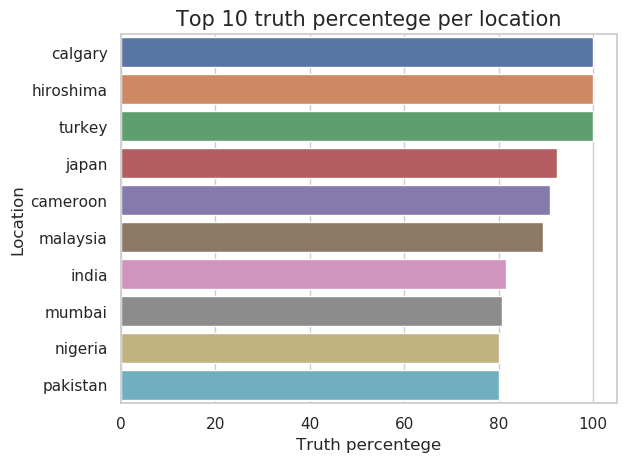

In [6]:
ax = sns.barplot(x=data_grouped_location['target_mean'].nlargest(10) * 100,y=data_grouped_location['target_mean'].nlargest(10).index,orient='h')
ax.set_title("Top 10 truth percentege per location", fontsize = 15)
ax.set_xlabel("Truth percentege", fontsize = 12)
ax.set_ylabel("Location", fontsize = 12)

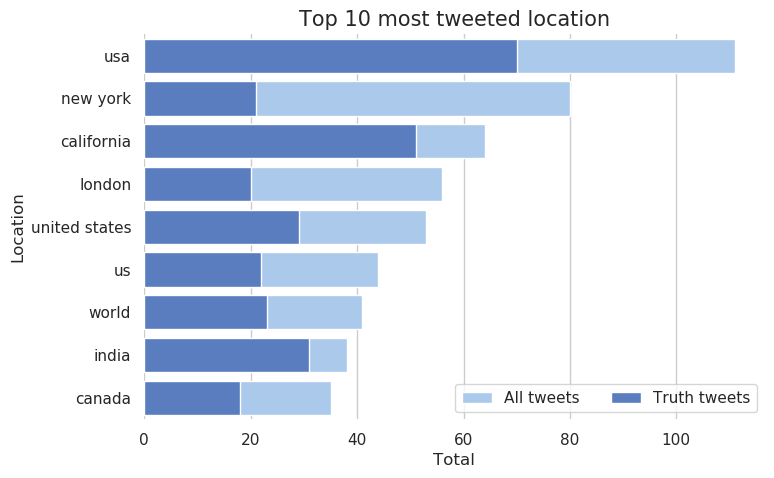

In [7]:
index_most_tweeted = data_grouped_location['target_count'].nlargest(10).index
index_most_tweeted = index_most_tweeted.drop('unknown') #Ya que en la limpieza de datos determinamos que son valores desconocidos
f, ax = plt.subplots(figsize=(8, 5))

sns.set_color_codes("pastel")
sns.barplot(x=data_grouped_location.loc[index_most_tweeted,'target_count'], y=index_most_tweeted,
            label="All tweets", color="b")

sns.set_color_codes("muted")
sns.barplot(x=data_grouped_location.loc[index_most_tweeted,'target_sum'], y=index_most_tweeted,
            label="Truth tweets", color="b")

# Add a legend and informative axis label
ax.set_title("Top 10 most tweeted location", fontsize = 15)
ax.set_ylabel("Location", fontsize = 12)
# ax.set_xlabel("Truth percentege", fontsize = 12)
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="Location",xlabel="Total")
sns.despine(left=True, bottom=True)

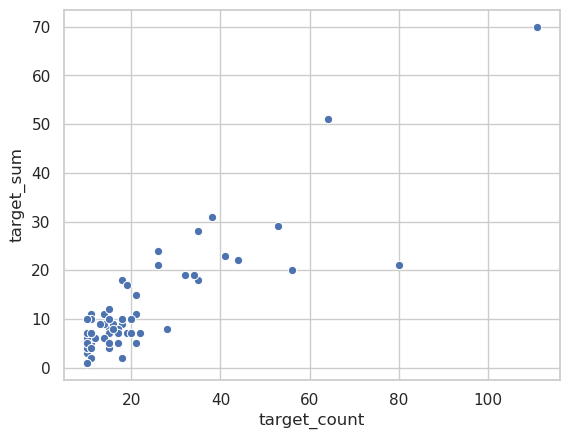

In [8]:
# no pareciera haber relacion entre la cantidad de veces mencionada con su verdad
data_grouped_location = data_grouped_location.drop(data_grouped_location.loc[data_grouped_location.index == 'unknown'].index)
sns.scatterplot(x=data_grouped_location['target_count'],y=data_grouped_location['target_sum'])

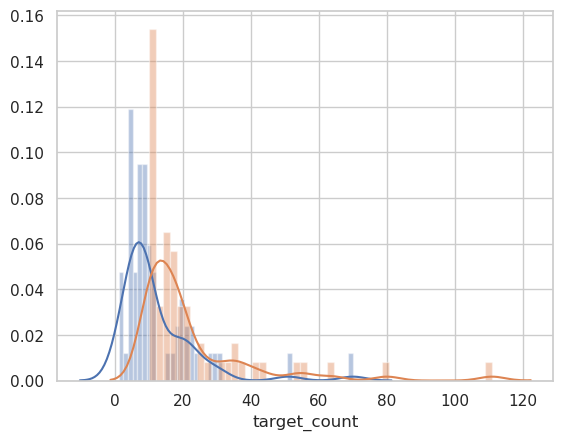

In [9]:
# distribucion de locations verdaderas vs distribucion de location falsas
g = sns.distplot(data_grouped_location['target_sum'],bins=50,hist=True) #tweets verdaderos por location
g = sns.distplot(data_grouped_location['target_count'],bins=50,hist=True) #tweets por location

In [10]:
#Getting the data for location-keyword relationshp analysis
twitterCleanData = pd.read_csv('./ToChangeKeywordsAndLocations/withoutEncoding.csv')
twitterKeywordAndLocation = twitterCleanData[['keyword', 'location']]
#Filtering those values that are missing
twitterKeywordAndLocation = twitterKeywordAndLocation[twitterKeywordAndLocation['keyword'] != 'unknown']
twitterKeywordAndLocation = twitterKeywordAndLocation[twitterKeywordAndLocation['location'] != 'unknown']
twitterKeywordAndLocation.head()

,keyword,location
0,earthquake,us
1,fire,la
3,evacuation,california
4,smoke,alaska
5,fire,california


In [11]:
#Some of DataFrame's properties
twitterKeywordAndLocation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5931 entries, 0 to 7612
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   keyword   5931 non-null   object
 1   location  5931 non-null   object
dtypes: object(2)
memory usage: 139.0+ KB


In [12]:
#Changing DataFrmae columns data types in order to apply some operations on them 

twitterKeywordAndLocation['keyword'] = twitterKeywordAndLocation['keyword'].astype('string')
twitterKeywordAndLocation['location'] = twitterKeywordAndLocation['location'].astype('string')

In [13]:
#Visualization

#Counter of keywords
twitterKeywordAndLocation['counter'] = 1
twitterKeywordAndLocation

,keyword,location,counter
0,earthquake,us,1
1,fire,la,1
3,evacuation,california,1
4,smoke,alaska,1
5,fire,california,1
...,...,...,...
7603,quarantine,alabama,1
7606,suicide bomber,world,1
7607,tornado,oklahoma,1
7609,wild fires,california,1


In [14]:
#Number of keywords per location
keywordsPerLocation = twitterKeywordAndLocation.groupby('location')\
.agg({'counter' : 'sum'})
keywordsPerLocation = keywordsPerLocation.reset_index()
keywordsPerLocation

,location,counter
0,"#1 vacation destination,hawaii",1
1,#937??#734,1
2,#????? libya#,1
3,#blacklivesmatter,1
4,#bossnation!,1
...,...,...
3326,"ìït: 42.910975,-78.865828",1
3327,"ìït: 43.631838,-79.55807",1
3328,"ìït: 6.4682,3.18287",1
3329,"ìït: 6.488400524109015,3.352798039832285",1


In [15]:
top20KeywordsPerLocation = keywordsPerLocation.nlargest(20, 'counter')
top20KeywordsPerLocation

,location,counter
3021,usa,111
2011,new york,80
589,california,64
1676,london,55
2996,united states,53
3016,us,44
3232,world,41
1398,india,38
605,canada,35
2048,nigeria,35


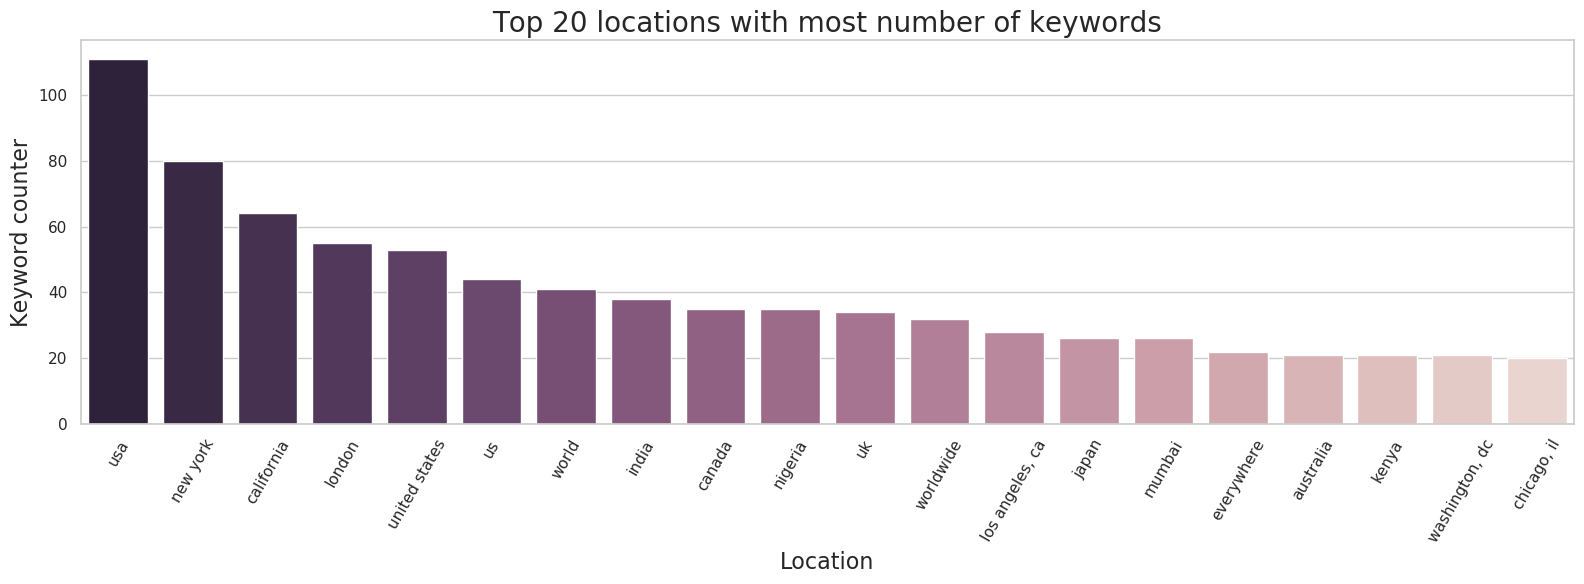

In [16]:
#barplot

ax = sns.barplot(x = 'location', y = 'counter', data = top20KeywordsPerLocation,\
                palette = sns.cubehelix_palette(20, reverse = True))
ax.set_ylabel('Keyword counter', size = 16)
ax.set_xlabel('Location', size = 16)
ax.set_title('Top 20 locations with most number of keywords', size = 20)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 60)
ax.figure.set_size_inches(16, 6)
plt.tight_layout()
ax.get_figure().savefig("Top20LocationsWithMosthKeywords.png")

In [17]:
#Cleaning the data
#Dropping those locations that don't have a significant number of keywords
#For that, first we see the average
keywordMean = keywordsPerLocation['counter'].mean()
keywordMean = int(keywordMean)
keywordMean

1

In [18]:
#Then, we filter
keywordsPerLocation = keywordsPerLocation[keywordsPerLocation['counter'] > keywordMean]
keywordsPerLocation.describe()

,counter
count,644.00
mean,5.04
std,8.09
min,2.00
25%,2.00
50%,3.00
75%,5.00
max,111.00


In [19]:
#Most popular keywords
keywordsPopular = twitterKeywordAndLocation.groupby('keyword')\
.agg({'counter' : 'sum'})
keywordsPopular = keywordsPopular.reset_index()
top20KeywordsPopular = keywordsPopular.nlargest(20, 'counter')

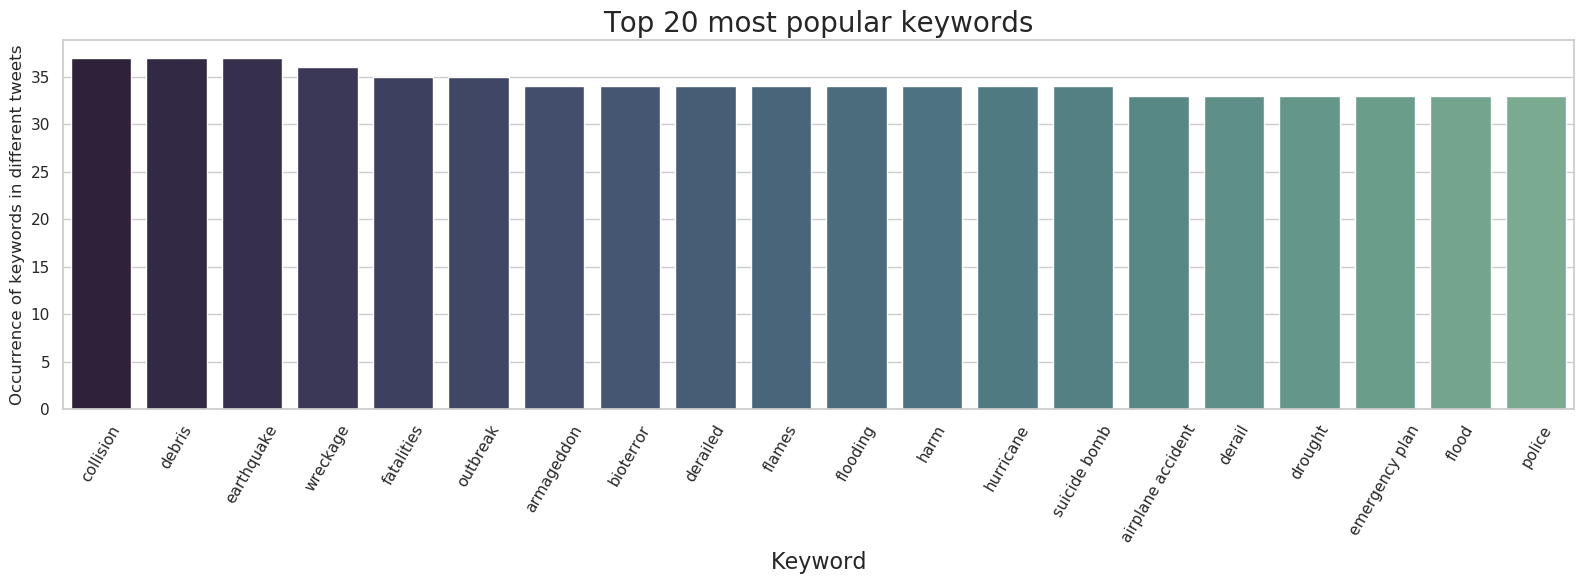

In [20]:
#barplot

ax = sns.barplot(x = 'keyword', y = 'counter', data = top20KeywordsPopular,\
                palette = sns.cubehelix_palette(30, start=.5, rot = -.75, reverse = True))
ax.set_ylabel('Occurrence of keywords in different tweets', size = 12)
ax.set_xlabel('Keyword', size = 16)
ax.set_title('Top 20 most popular keywords', size = 20)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 60)
ax.figure.set_size_inches(16, 6)
plt.tight_layout()
ax.get_figure().savefig("Top20MostPopularKeywords.png", optimize = True)

In [21]:
#Removing non representative samples
keywordsPopularMean = keywordsPopular.mean()
keywordsPopularMean = int(keywordsPopularMean)
keywordsPopular = keywordsPopular[keywordsPopular['counter'] > keywordsPopularMean]
keywordsPopular.describe()

,counter
count,132.00
mean,30.22
std,2.49
min,27.00
25%,28.00
50%,30.00
75%,32.00
max,37.00


In [22]:
#Comparison between the most popular keywords and locations associated to those keywords
locationAndKeyword = pd.merge(twitterKeywordAndLocation, keywordsPopular, on = 'keyword')
locationAndKeyword.head()

,keyword,location,counter_x,counter_y
0,earthquake,us,1,37
1,earthquake,argentina,1,37
2,earthquake,earth,1,37
3,earthquake,vashon,1,37
4,earthquake,sydney,1,37


In [23]:
locationAndKeyword.drop(['counter_x', 'counter_y'], axis = 1, inplace = True)
locationAndKeyword['counter'] = 1
locationAndKeyword.head()

,keyword,location,counter
0,earthquake,us,1
1,earthquake,argentina,1
2,earthquake,earth,1
3,earthquake,vashon,1
4,earthquake,sydney,1


In [24]:
locationAndKeyword = locationAndKeyword.groupby(['keyword', 'location'])\
.agg({'counter' : 'sum'})
locationAndKeyword = locationAndKeyword.sort_values(by = 'counter', ascending = False)
locationAndKeyword = locationAndKeyword.reset_index()
locationAndKeyword

,keyword,location,counter
0,razed,california,23
1,sandstorm,usa,17
2,loud bang,kenya,16
3,flood,new york,13
4,arsonist,ss,10
...,...,...,...
3462,displaced,mechanicsburg,1
3463,displaced,"na:tinixw / hoopa, berkeley",1
3464,displaced,new york city,1
3465,displaced,north carolina,1


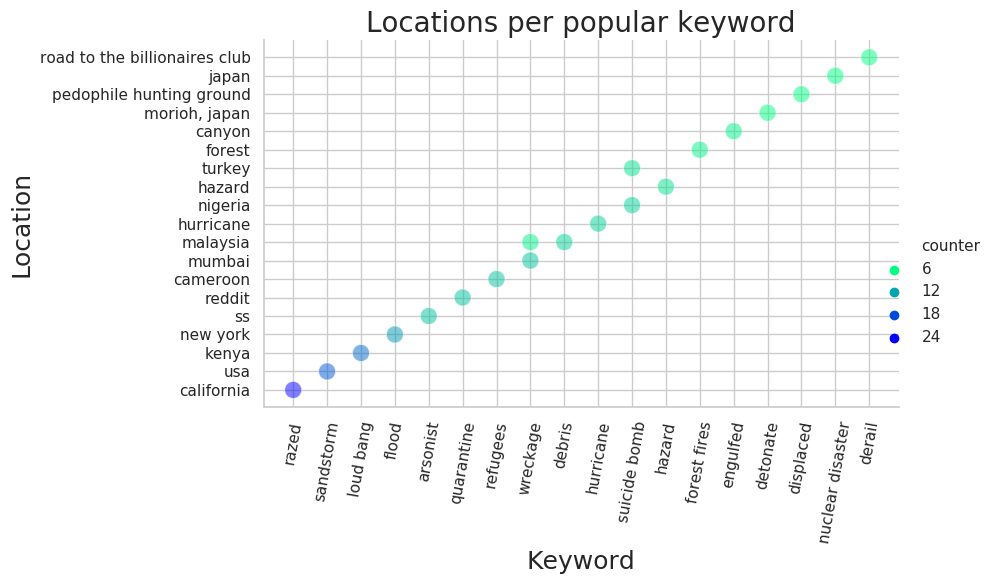

In [25]:
#scatterplot

g = sns.relplot(x = 'keyword', y = 'location', hue = 'counter',\
            s = 150, alpha = .5, height = 5, data = locationAndKeyword.head(20),\
               palette = "winter_r")

g.ax.set_title('Locations per popular keyword', fontsize = 20)
g.set_xlabels('Keyword',fontsize = 18)
g.set_ylabels('Location', fontsize = 18)
g.ax.set_xticklabels(g.ax.get_xticklabels(), rotation = 80)
g.ax.figure.set_size_inches(10, 6)
plt.tight_layout()
g.ax.get_figure().savefig("LocationPeroPopularKeyword.png")

In [26]:
tweetsInfo = pd.read_csv('./ToChangeKeywordsAndLocations/withoutEncoding.csv', usecols = ['text', 'target'])
tweetsInfo.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [27]:
#Starting the analisis for the relation between keywords and hashtags
hashForKeywordsAndHashtags = {}
csvFormatted = pd.read_csv('./ToChangeKeywordsAndLocations/withoutEncoding.csv', usecols = ['keyword', 'text', 'target'])
csvFormatted = csvFormatted[csvFormatted['keyword'] != 'unknown']
csvFormatted['keyword'].value_counts().head(20)

fatalities    45
deluge        42
armageddon    42
earthquake    42
damage        42
sinking       41
fire          41
body bags     41
flooding      41
collided      41
evacuate      41
harm          41
fear          40
siren         40
evacuation    40
twister       40
windstorm     40
outbreak      40
wreckage      39
whirlwind     39
Name: keyword, dtype: int64

In [28]:
def sumHashtagIfNedeed(line, keyword, hashOfKeywords):
    for word in line.split():
        if not word.startswith('#'):
            continue
        word = word.lower().lstrip('#')
        if keyword not in hashOfKeywords:
            hashOfKeywords[keyword] = {}
        hashOfKeywords[keyword][word.lstrip('#')] = hashOfKeywords[keyword].get(word.lstrip('#'), 0) + 1

In [29]:
csvFormatted.apply(lambda x: sumHashtagIfNedeed(x['text'], x['keyword'], hashForKeywordsAndHashtags), axis = 1)

0       None
1       None
2       None
3       None
4       None
        ... 
7608    None
7609    None
7610    None
7611    None
7612    None
Length: 7596, dtype: object

In [30]:
d = {'keyword': [], 'amount': []}
for key in hashForKeywordsAndHashtags:
    d['keyword'].append(key)
    d['amount'].append(sum(hashForKeywordsAndHashtags[key].values()))
keywordDf = pd.DataFrame(d, columns =['keyword', 'amount'])
keywordDf = keywordDf.sort_values(by = ['amount']).tail(20)
keywordDf

,keyword,amount
209,weapons,29
141,mayhem,30
51,chemical emergency,31
49,catastrophe,31
124,hellfire,31
10,airplane accident,33
179,snowstorm,35
174,seismic,36
0,earthquake,38
122,hazardous,41


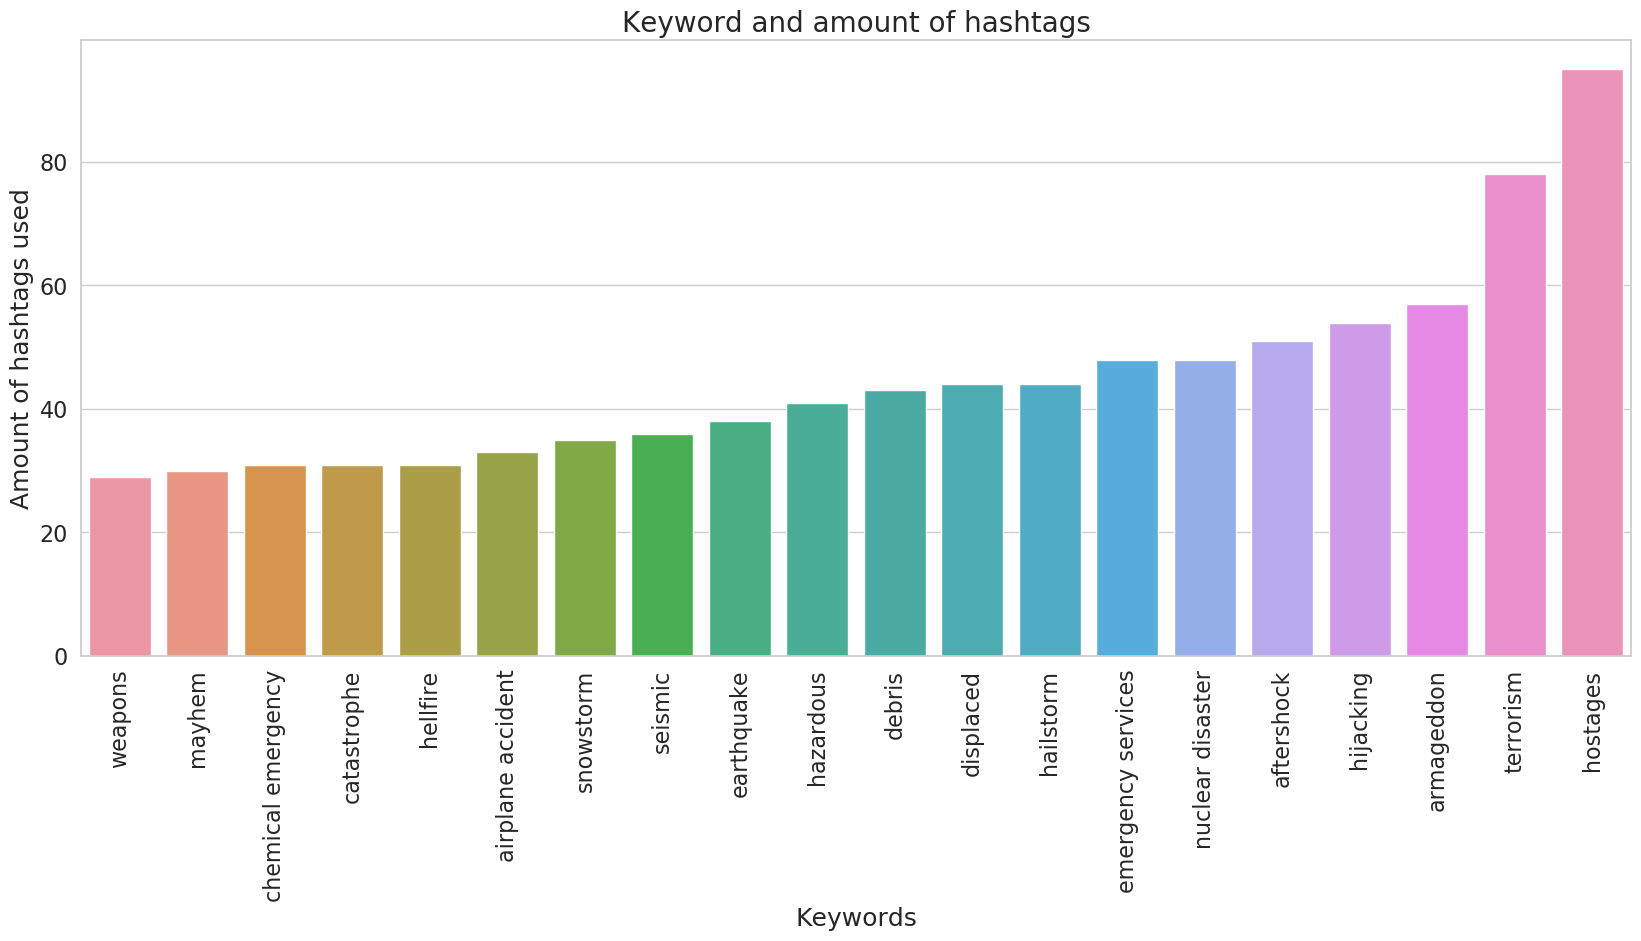

In [31]:
ax = sns.barplot(x = 'keyword', y = 'amount', data = keywordDf);
ax.set_title('Keyword and amount of hashtags', fontsize=20)
ax.set_xlabel('Keywords', fontsize = 18)
ax.set_ylabel('Amount of hashtags used', fontsize = 18)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.tick_params(axis="x", labelsize='large')
ax.tick_params(axis="x", labelsize=16)
ax.tick_params(axis="y", labelsize=16)
ax.figure.set_size_inches(20, 8);
plt.show()

In [32]:
csvWithOnlyKeywordTarget = csvFormatted.drop('text', 1)
csvWithOnlyKeywordTarget = csvWithOnlyKeywordTarget.groupby(['keyword']).agg({'target': ['mean', 'count']})
csvWithOnlyKeywordTarget.columns = csvWithOnlyKeywordTarget.columns.get_level_values(0) + '_' + csvWithOnlyKeywordTarget.columns.get_level_values(1)
csvWithOnlyKeywordTarget = csvWithOnlyKeywordTarget.sort_values(by = ['target_mean']).reset_index() #Hasta aca tengo TODOS los valores de verdad
csvWithOnlyKeywordTarget = pd.merge(csvWithOnlyKeywordTarget, keywordDf, on='keyword', how='inner')
csvWithOnlyKeywordTarget.head(20)

,keyword,target_mean,target_count,amount
0,aftershock,0.00,34,51
1,mayhem,0.10,30,30
2,armageddon,0.12,42,57
3,hellfire,0.18,39,31
4,catastrophe,0.19,36,31
5,emergency services,0.33,33,48
6,weapons,0.44,39,29
7,snowstorm,0.45,29,35
8,chemical emergency,0.45,33,31
9,seismic,0.47,30,36


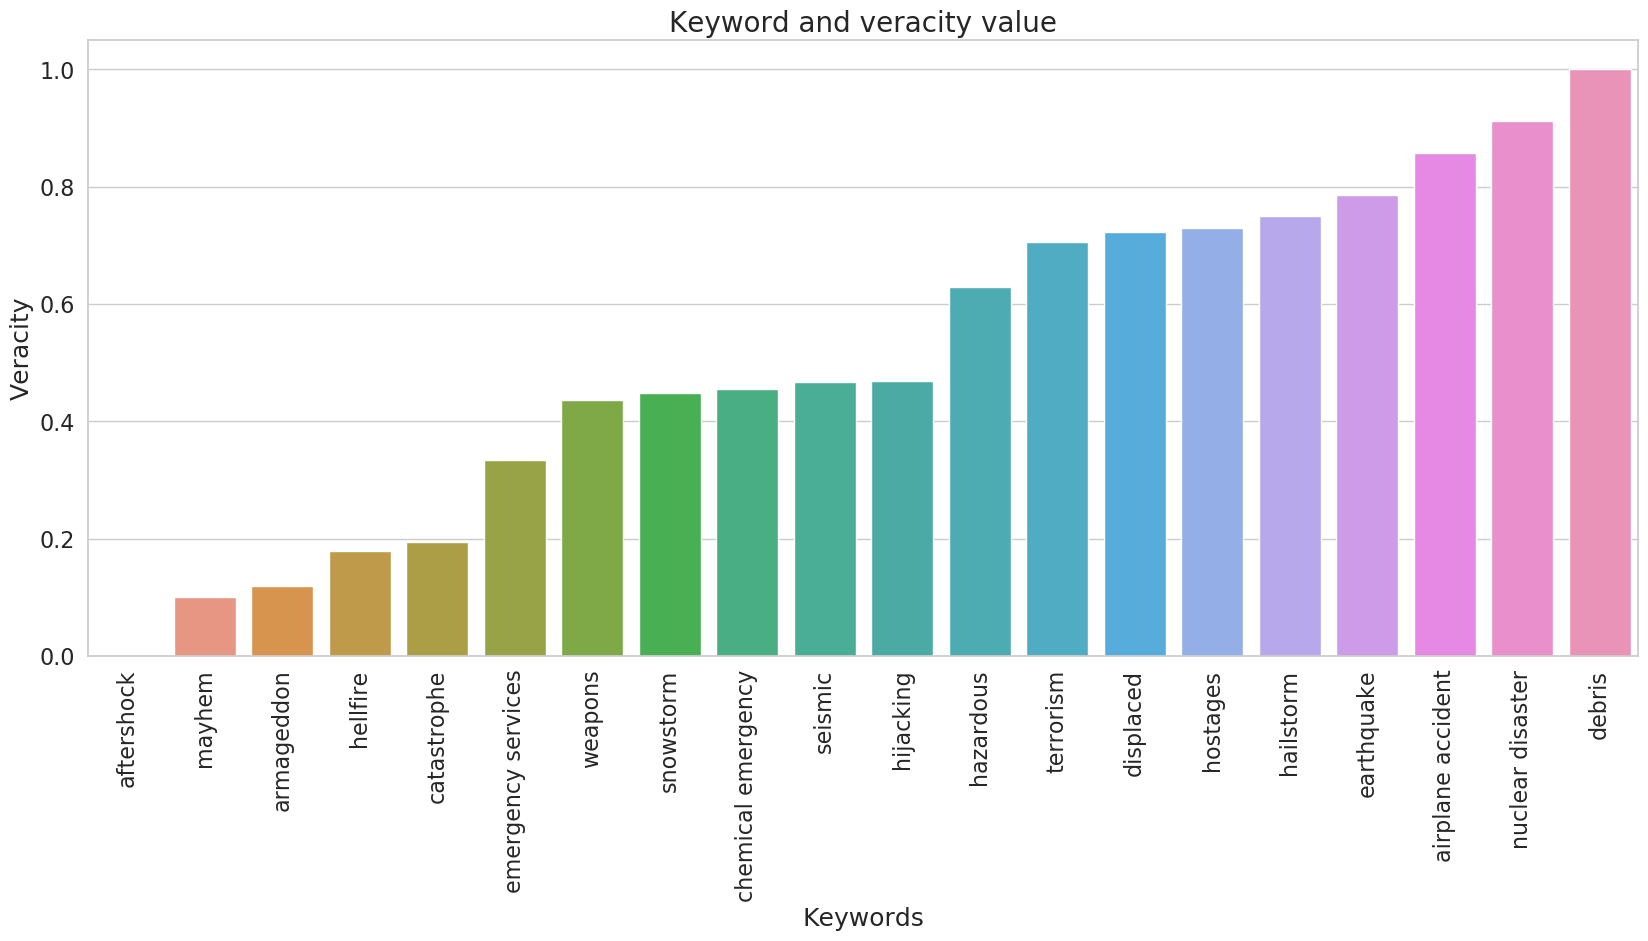

In [33]:
ax = sns.barplot(x = 'keyword', y = 'target_mean', data = csvWithOnlyKeywordTarget);
ax.set_title('Keyword and veracity value', fontsize=20)
ax.set_xlabel('Keywords', fontsize = 18)
ax.set_ylabel('Veracity', fontsize = 18)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.tick_params(axis="x", labelsize='large')
ax.tick_params(axis="x", labelsize=16)
ax.tick_params(axis="y", labelsize=16)
ax.figure.set_size_inches(20, 8);
plt.show()

In [34]:
tweetsInfo['tweet_length'] = tweetsInfo.text.str.len()

In [35]:
def validUser(userName):
    if '@' in userName:
        user = getter(userName, '@')
        length = len(user)
        if (length > 1 and length <= 16):
            for char in user[1:]:
                if not(char.isalnum() or char == '_'): return False
            return True
    return False

In [36]:
def validLink(link):
    type1 = 'https://'
    type2 = 'http://'
    if type1 in link and len(link) > 9: return True
    if type2 in link and len(link) > 8: return True
    return False

In [37]:
def validHashtag(hashtag):
    if '#' in hashtag:
        hashtag = getter(hashtag, '#')
        hashtag = hashtag[1:]
        return hashtag.isalnum()
    return False

In [38]:
#Function to analyze the elements (#. @, links) of the tweet
def analyzeTweets(text):
    result = [0,0,0] #number of usersTagged, hashtags and links
    text = text.split()
    for word in text:
        if validUser(word): result[0] += 1
        elif validHashtag(word): result[1] += 1
        elif validLink(word): result[2] += 1
    return result

In [39]:
#This function creates a new DF, char = # or @
#dicc is a dictionary, key: @user or #hashtag, value: [number of occurrence, number of true targets]
#func1 get the hashtag or user correctly
#func2 cheks if the result of func1 is correct
#text its a combination of two columns, text and target, the target is in the last position always
def dataFrameMaker(text, dicc, char, func1, func2):
    text = text.split()
    target = int(text[-1])
    for word in text:
        if char in word:
            auxString = func1(word, char)  #auxString could be a @user or a #hashtag
            if func2(auxString):
                auxString = auxString.lower()
                auxList = dicc[auxString] = dicc.get(auxString, [0,0])
                auxList[0] += 1
                auxList[1] += target

In [40]:
#Col1: column of the DF to filter
#condition: condition to filter
#col2: must be of type str
#col3: its type will be transform into str
#return a Serie with the combination of col2 and col3
def colsCombination(col1, condition, col2, col3):
        filterCondition = tweetsInfo[col1] > condition
        strCol2 = tweetsInfo[filterCondition][col2]
        strCol3 = tweetsInfo[filterCondition][col3]
        strCol3 = strCol3.astype(str)
        result = strCol2 + ' ' + strCol3
        return result

In [41]:
#Gets the hashtag or user
def getter(text, char):
    pos = text.find(char)
    text = text[pos:]
    #Some users or hashtags finish with : or .
    if text.endswith(':') or text.endswith('.'):
        text = text[:-1]
    return text

In [42]:
#Col1: column of the DF to filter
#condition: condition to filter
#col2: must be of type str
#col3: its type will be transform into str
#return a Serie with the combination of col2 and col3
def colsCombination(col1, condition, col2, col3):
        filterCondition = tweetsInfo[col1] > condition
        strCol2 = tweetsInfo[filterCondition][col2]
        strCol3 = tweetsInfo[filterCondition][col3]
        strCol3 = strCol3.astype(str)
        result = strCol2 + ' ' + strCol3
        return result

In [43]:
def getInfo(dataList, pos):
    return dataList[pos]

In [44]:
#Aux column to get the result
tweetsInfo['aux_column'] = tweetsInfo.text.apply(analyzeTweets)

tweetsInfo['users_tagged'] = tweetsInfo.aux_column.apply(getInfo,args=(0,))
tweetsInfo['hashtags'] = tweetsInfo.aux_column.apply(getInfo,args=(1,))
tweetsInfo['links'] = tweetsInfo.aux_column.apply(getInfo,args=(2,))

del tweetsInfo['aux_column']
tweetsInfo.head()

,text,target,tweet_length,users_tagged,hashtags,links
0,Our Deeds are the Reason of this #earthquake M...,1,69,0,1,0
1,Forest fire near La Ronge Sask. Canada,1,38,0,0,0
2,All residents asked to 'shelter in place' are ...,1,133,0,0,0
3,"13,000 people receive #wildfires evacuation or...",1,65,0,1,0
4,Just got sent this photo from Ruby #Alaska as ...,1,88,0,2,0


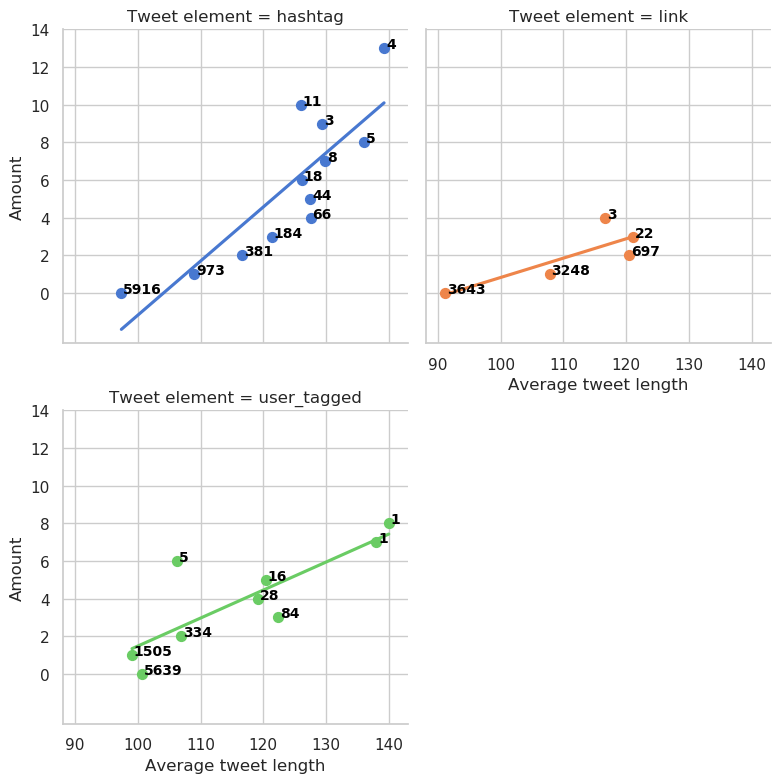

In [45]:
hashtagFrame = tweetsInfo[['tweet_length','hashtags']]
hashtagFrame['tweet_element'] = 'hashtag'

linksFrame = tweetsInfo[['tweet_length','links']]
linksFrame['tweet_element'] = 'link'

usersFrame = tweetsInfo[['tweet_length','users_tagged']]
usersFrame['tweet_element'] = 'user_tagged'

hashtagFrame.rename(columns={'hashtags':'Amount'},inplace=True)
linksFrame.rename(columns={'links':'Amount'},inplace=True)
usersFrame.rename(columns={'users_tagged':'Amount'},inplace=True)

appendedElements = hashtagFrame.append(linksFrame)
appendedElements = appendedElements.append(usersFrame)

groupedElements = appendedElements.groupby(['tweet_element','Amount']).agg({'tweet_length':['mean','count']})
labels0 = groupedElements.columns.get_level_values(0)
labels1 = groupedElements.columns.get_level_values(1)
groupedElements.columns = labels0 + '_' + labels1
groupedElements.reset_index(inplace=True)
groupedElements.rename(columns={'tweet_length_count':'occurrence', 'tweet_element':'Tweet element',\
                               'tweet_length_mean':'Average tweet length'}, inplace=True)
groupedElements

plot = sns.lmplot(x="Average tweet length", y="Amount", col="Tweet element", hue="Tweet element", data=groupedElements, col_wrap=2, ci=None, palette="muted", height=4,\
         scatter_kws={"s": 50, "alpha": 1},legend = True)

# add annotations one by one with a loop
auxCont = 0
auxDicc = {0:'hashtag',1:'link',2:'user_tagged'}
for ax in plot.axes:
    element = auxDicc[auxCont]
    for line in range(0, groupedElements.shape[0]):
            ax.set_yticks([0,2,4,6,8,10,12,14])
            if groupedElements['Tweet element'][line] == element:
                ax.text(groupedElements['Average tweet length'][line]+0.30, groupedElements.Amount[line], groupedElements.occurrence[line],\
                horizontalalignment='left', size='small', color='black', weight='semibold')
    auxCont += 1

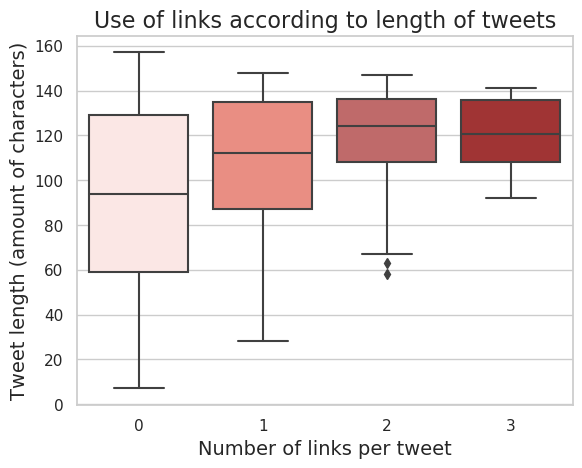

In [46]:
#Links boxplot
colors = {0: 'mistyrose', 1: 'salmon', 2: 'indianred', 3: 'firebrick'}
linksData = tweetsInfo[['tweet_length','links']][tweetsInfo.links <= 3]
ax = sns.boxplot(x = 'links', y = 'tweet_length', data = linksData, palette = colors)
ax.set_title('Use of links according to length of tweets',fontsize = 16)
ax.set_ylabel('Tweet length (amount of characters)', fontsize = 14)
ax.set_xlabel('Number of links per tweet', fontsize = 14);

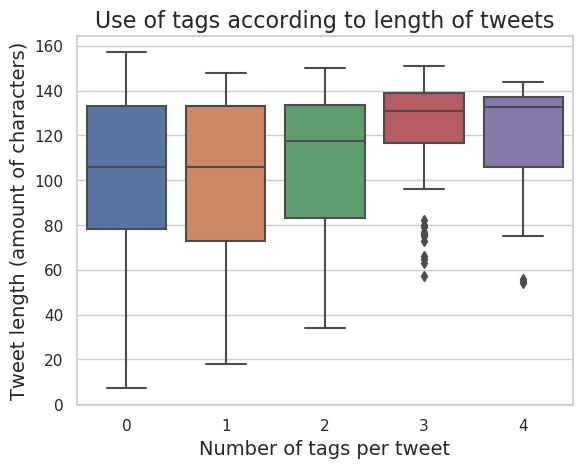

In [47]:
#Users tagged boxplot
usersTaggedData = tweetsInfo[['tweet_length','users_tagged']][tweetsInfo.users_tagged < 5]
ax = sns.boxplot(x = 'users_tagged', y = 'tweet_length', data = usersTaggedData)
ax.set_title('Use of tags according to length of tweets',fontsize = 16)
ax.set_ylabel('Tweet length (amount of characters)', fontsize = 14)
ax.set_xlabel('Number of tags per tweet', fontsize = 14);

In [48]:
#Building the usersTagged df
usersDicc = {}
tweetsInfoTags = colsCombination('users_tagged',0,'text','target')
tweetsInfoTags.apply(dataFrameMaker, args = (usersDicc,'@',getter,validUser))

31      None
36      None
43      None
54      None
63      None
        ... 
7577    None
7578    None
7581    None
7596    None
7609    None
Length: 1974, dtype: object

In [49]:
usersSerie = pd.Series(usersDicc)
usersDataFrame = usersSerie.to_frame(name='auxCol')
usersDataFrame['occurrence'] = usersDataFrame.auxCol.apply(getInfo,args=(0,))
usersDataFrame['target_sum'] = usersDataFrame.auxCol.apply(getInfo,args=(1,))
del usersDataFrame['auxCol']
usersDataFrame.head()

,occurrence,target_sum
@bbcmtd,1,1
@phdsquares,1,0
@southridgelife,1,0
@alexis_sanchez,1,0
@navista7,1,1


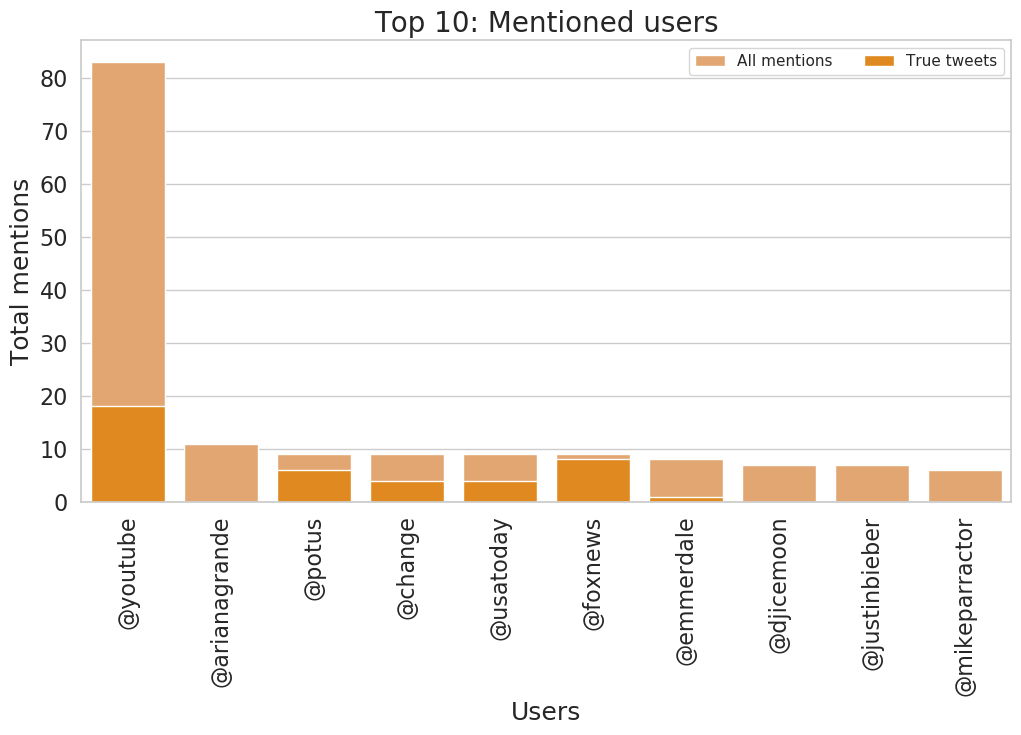

In [50]:
#Top 10 mentioned users barplot
topMentions = usersDataFrame[usersDataFrame.occurrence > 5]
topMentionUsers = topMentions.occurrence.nlargest(10).index

ax = sns.barplot(x=topMentionUsers, y = topMentions.loc[topMentionUsers,'occurrence'],color='sandybrown',label='All mentions')
sns.barplot(x=topMentionUsers, y = topMentions.loc[topMentionUsers,'target_sum'], color='darkorange',label='True tweets')

ax.set_title('Top 10: Mentioned users', fontsize=20)
ax.set_xlabel('Users', fontsize = 18)
ax.set_ylabel('Total mentions', fontsize = 18)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.tick_params(axis="both", labelsize=16)
ax.legend(ncol=2, loc='best', frameon=True);
ax.figure.set_size_inches(12, 6);

In [51]:
#Building the hashtags df
hashtagsDicc = {}
tweetsInfoHashtags = colsCombination('hashtags',0,'text','target')
tweetsInfoHashtags.apply(dataFrameMaker, args = (hashtagsDicc,'#',getter,validHashtag))

0       None
3       None
4       None
5       None
6       None
        ... 
7598    None
7599    None
7601    None
7604    None
7607    None
Length: 1697, dtype: object

In [52]:
hashtagsSerie = pd.Series(hashtagsDicc)
hashtagsDataFrame = hashtagsSerie.to_frame(name='auxCol')
hashtagsDataFrame['occurrence'] = hashtagsDataFrame.auxCol.apply(getInfo, args=(0,))
hashtagsDataFrame['target_sum'] = hashtagsDataFrame.auxCol.apply(getInfo, args=(1,))
del hashtagsDataFrame['auxCol']
hashtagsDataFrame.head()

,occurrence,target_sum
#earthquake,19,19
#wildfires,5,5
#alaska,2,1
#rockyfire,4,4
#cafire,2,2


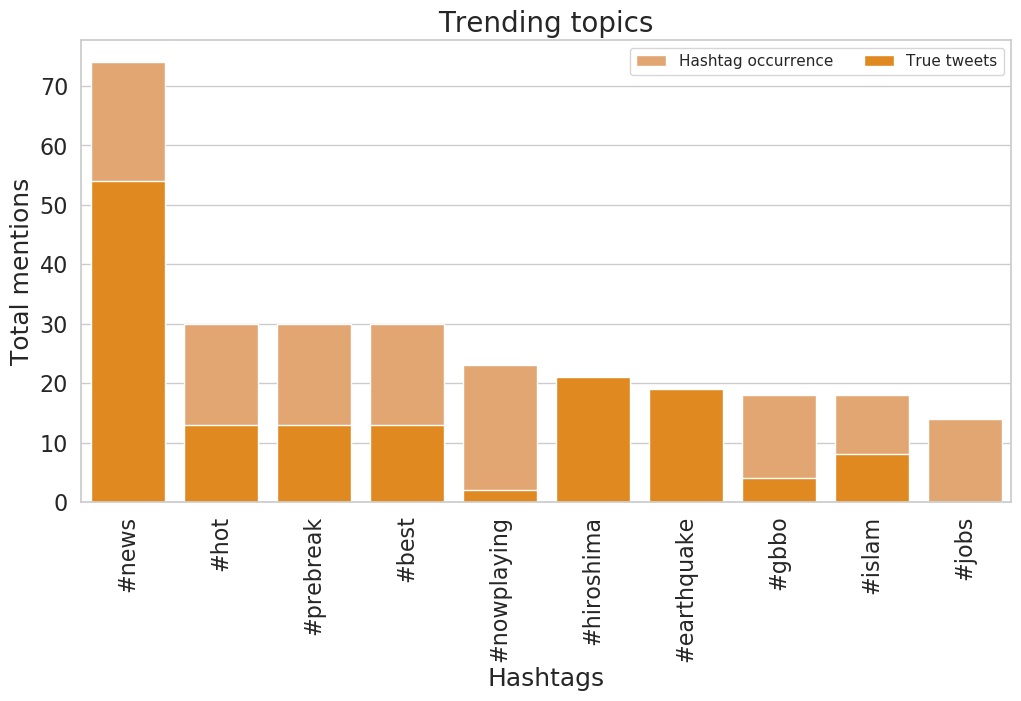

In [53]:
#Trending topics barplot
trendingTopics = hashtagsDataFrame[hashtagsDataFrame.occurrence > 5]
trendingTopicHashtags = trendingTopics.occurrence.nlargest(10).index

ax = sns.barplot(x=trendingTopicHashtags, y = trendingTopics.loc[trendingTopicHashtags,'occurrence'],color='sandybrown',label='Hashtag occurrence')
sns.barplot(x=trendingTopicHashtags, y = trendingTopics.loc[trendingTopicHashtags,'target_sum'], color='darkorange',label='True tweets')

ax.set_title('Trending topics', fontsize=20)
ax.set_xlabel('Hashtags', fontsize = 18)
ax.set_ylabel('Total mentions', fontsize = 18)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.tick_params(axis="both", labelsize=16)
ax.legend(ncol=2, loc='best', frameon=True)
ax.figure.set_size_inches(12, 6);

In [54]:
grouped = tweetsInfo.groupby('tweet_length').agg({'target':'sum','text':'count','hashtags':'sum','users_tagged':'sum','links':'sum'})
grouped['total_elements'] = grouped.links + grouped.hashtags + grouped.users_tagged
grouped['truth_percentage'] = (grouped.target / grouped.text) * 100
grouped.index.rename('lengths', inplace = True)

In [55]:
max_quantity, min_quantity = grouped.text.max(), grouped.text.min()
max_quantity, min_quantity

(401, 1)

In [56]:
grouped.drop(grouped[grouped.text <= 10].index, inplace=True)
grouped.reset_index(inplace = True)
grouped.head()

,lengths,target,text,hashtags,users_tagged,links,total_elements,truth_percentage
0,18,2,14,0,2,0,2,14.29
1,19,1,11,0,2,0,2,9.09
2,22,4,14,0,4,0,4,28.57
3,24,2,12,0,4,0,4,16.67
4,25,3,17,0,6,0,6,17.65


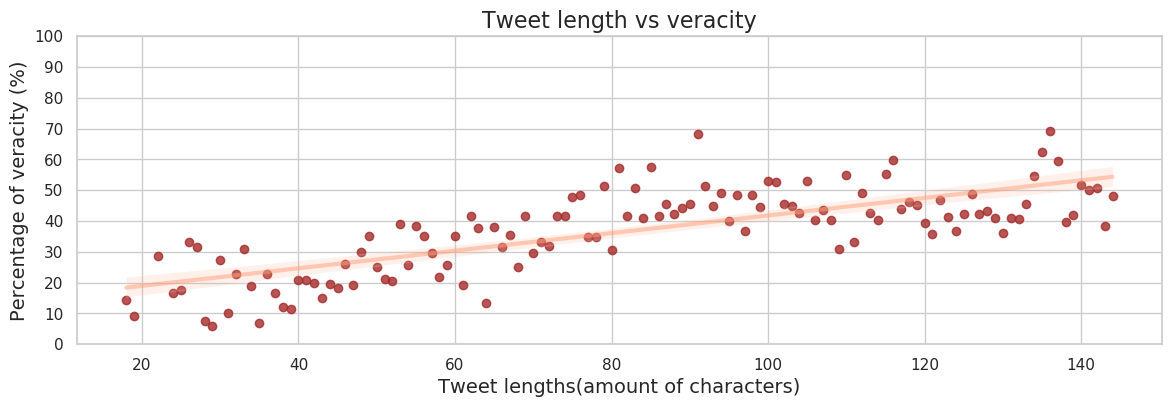

In [57]:
#Regplot 1
ax = sns.regplot(x='lengths', y='truth_percentage', data=grouped,\
                line_kws = {'color':'lightsalmon','alpha':0.5,'lw':3},\
                color = 'brown')

ax.set_xlabel('Tweet lengths(amount of characters)', fontsize = 14)
ax.set_ylabel('Percentage of veracity (%)', fontsize = 14)
ax.set_yticks(np.arange(0,110,10))
ax.set_title('Tweet length vs veracity', fontsize=16)
ax.figure.set_size_inches(14,4);

In [58]:
#Natural disasters
df1 = pd.read_csv('./ToChangeKeywordsAndLocations/withoutEncoding.csv', usecols=['id','keyword','location'])
df2 = tweetsInfo
disastersDF = pd.concat([df1,df2], axis = 1)
disastersDF.head()

,id,keyword,location,text,target,tweet_length,users_tagged,hashtags,links
0,1,earthquake,us,Our Deeds are the Reason of this #earthquake M...,1,69,0,1,0
1,4,fire,la,Forest fire near La Ronge Sask. Canada,1,38,0,0,0
2,5,evacuation,unknown,All residents asked to 'shelter in place' are ...,1,133,0,0,0
3,6,evacuation,california,"13,000 people receive #wildfires evacuation or...",1,65,0,1,0
4,7,smoke,alaska,Just got sent this photo from Ruby #Alaska as ...,1,88,0,2,0


In [59]:
#Some auxiliar functions
def getSeriesElements(serie, setElements):
    for element in serie.values: #Element is a string always
        if '/' in element:
            element = element.split('/')
            for elemt in element: setElements.add(elemt.lower())
                
        else: setElements.add(element.lower())

In [60]:
#the info is between position 2 and 6, both included
def obtainInfo(infoList):
    naturalDisasters = {} #Key: group, value: {subgroups}
    for i in range (2,7): #To iterate the info in the list
        dataFrame = infoList[i]
        #Always delete the first row, it dosent have info
        dataFrame.drop(0, inplace = True)
        #The group always is at (0,1)
        group = dataFrame.iloc[0,1]
        #Now its time to iterate the columns of the DF
        cols = len(dataFrame.columns)
        subgroups = set()
        for col in range(2, cols):
            serie = dataFrame[col] #This is a serie
            serie.dropna(inplace=True)
            serie.drop_duplicates(inplace=True)
            getSeriesElements(serie, subgroups)
        naturalDisasters[group] = subgroups
    return naturalDisasters

In [61]:
#Reading the info about natural disasters
#naturalDisastersDicc key: group value: set of subgroups
dataPage = pd.read_html('https://www.emdat.be/classification')
naturalDisastersDicc = obtainInfo(dataPage)

In [62]:
#Adding missing items
geo = naturalDisastersDicc['Geophysical']
geo.update({'volcano', 'sinkhole', 'lava'})

met = naturalDisastersDicc['Meteorological']
met.update({'hurricane','typhoon','twister','cyclone','hailstorm',\
            'violent storm','rainstorm','sandstorm','snowstorm','windstorm'})
met -= {'lightning','derecho','sand','wind'}

hydro = naturalDisastersDicc['Hydrological']
hydro.update({'debris','mudslide','avalanche','rockfall'})
hydro.remove('avalanche (snow, debris, mudflow, rockfall)')

clima = naturalDisastersDicc['Climatological']
clima.update({'bush fire', 'land fire', 'brush fire'})
clima.remove('land fire: brush, bush,  pasture')

In [63]:
#Creating a new set with the union of all the subgroups
allNaturalDisasters = set()
for value in naturalDisastersDicc.values():
    allNaturalDisasters = allNaturalDisasters.union(value)

In [64]:
#Some keywords are about natural disasters but they are in plural
#we fix that whit this function
def fixingKeywords(keyword):
    auxDictionary = {'floods':'flood', 'wild fires': 'wildfire', 'forest fires':'forest fire',\
                    'bush fires':'bush fire'}
    return auxDictionary.get(keyword, keyword)

In [65]:
disastersDF.keyword = disastersDF.keyword.apply(fixingKeywords)

In [66]:
condition = ~(disastersDF.keyword.isin(allNaturalDisasters))
naturalDisastersDF = disastersDF.drop(disastersDF[condition].index)
naturalDisastersDF.head()

,id,keyword,location,text,target,tweet_length,users_tagged,hashtags,links
0,1,earthquake,us,Our Deeds are the Reason of this #earthquake M...,1,69,0,1,0
9,15,tornado,unknown,I'm afraid that the tornado is coming to our a...,1,52,0,0,0
10,16,heat wave,unknown,Three people died from the heat wave so far,1,43,0,0,0
13,19,flood,bago,#Flood in Bago Myanmar #We arrived Bago,1,39,0,2,0
517,746,avalanche,los angeles,#WeLoveLA #NHLDucks Avalanche Defense: How The...,0,112,0,3,1


In [67]:
#group by subgroup of natural disaster
natDisastGrouped = naturalDisastersDF.groupby('keyword').agg({'tweet_length':['max','min','mean'],\
                                                             'text':'count','target':'sum',\
                                                             'users_tagged':'sum','hashtags':'sum','links':'sum'})
natDisastGrouped.head()

tweet_length                           text target users_tagged  \
                   max min                 mean count    sum          sum   
keyword                                                                     
avalanche          139  34               101.20    30      4            7   
blizzard           140  20                71.89    37      4           20   
bush fire          140  33               107.88    25     18           10   
cyclone            142  52               109.22    32     19           10   
debris             140  34               107.97    38     38            3   

          hashtags links  
               sum   sum  
keyword                   
avalanche       18    29  
blizzard         3    15  
bush fire        3    20  
cyclone         20    26  
debris          19    35

In [68]:
#Changing the labels
labels0 = natDisastGrouped.columns.get_level_values(0)
labels1 = natDisastGrouped.columns.get_level_values(1)
natDisastGrouped.columns = labels0 + '_' + labels1
natDisastGrouped.head()

,tweet_length_max,tweet_length_min,tweet_length_mean,text_count,target_sum,users_tagged_sum,hashtags_sum,links_sum
keyword,,,,,,,,
avalanche,139,34,101.20,30,4,7,18,29
blizzard,140,20,71.89,37,4,20,3,15
bush fire,140,33,107.88,25,18,10,3,20
cyclone,142,52,109.22,32,19,10,20,26
debris,140,34,107.97,38,38,3,19,35


In [69]:
#Function to obtain the group of a keyword
def naturalDisasterGroup(keyword):
    for key, value in naturalDisastersDicc.items():
        if keyword in value: return key

In [70]:
natDisastGrouped.reset_index(inplace=True)
#Adding the column 'group', to the data frama
natDisastGrouped['group'] = natDisastGrouped.keyword.apply(naturalDisasterGroup)

In [71]:
natDisastGrouped.shape

(31, 10)

In [72]:
natDisastGrouped.rename(columns = {'keyword':'subgroup'},inplace=True)
natDisastGrouped.sort_values(by='group',inplace=True)  #easy to order, has 30 rows

In [73]:
natDisastGrouped.set_index(['group','subgroup'],inplace=True)
natDisastGrouped.head()

tweet_length_max  tweet_length_min  \
group          subgroup                                          
Climatological bush fire                 140                33   
               drought                   140                26   
               wildfire                  144                36   
               forest fire               140                42   
Geophysical    lava                      139                11   

                              tweet_length_mean  text_count  target_sum  \
group          subgroup                                                   
Climatological bush fire                 107.88          25          18   
               drought                    99.43          35          28   
               wildfire                  107.77          66          58   
               forest fire               106.96          51          42   
Geophysical    lava                       86.68          34           5   

                            users_tagged_sum  hashtags_sum  links_sum  
group          subgroup                                                
Climatological bush fire                  10             3         20  
               drought                     9            20         28  
               wildfire                   16            35         52  
               forest fire                12            18         36  
Geophysical    lava                       18            12         21

In [74]:
#Adding the column 'truth_percentage' = (target_sum / text_count) * 100
natDisastGrouped['truth_percentage'] = (natDisastGrouped.target_sum / natDisastGrouped.text_count) * 100
natDisastGrouped

tweet_length_max  tweet_length_min  \
group          subgroup                                            
Climatological bush fire                   140                33   
               drought                     140                26   
               wildfire                    144                36   
               forest fire                 140                42   
Geophysical    lava                        139                11   
               volcano                     143                30   
               tsunami                     148                18   
               sinkhole                    147                32   
               earthquake                  142                14   
               landslide                   145                34   
Hydrological   mudslide                    135                25   
               avalanche                   139                34   
               flood                       145                21   
               debris                      140                34   
Meteorological heat wave                   141                33   
               blizzard                    140                20   
               violent storm               140                55   
               typhoon                     145                37   
               twister                     148                29   
               cyclone                     142                52   
               tornado                     141                26   
               thunderstorm                140                29   
               storm                       141                14   
               snowstorm                   146                50   
               sandstorm                   140                22   
               rainstorm                   140                25   
               dust storm                  140                25   
               hail                        142                29   
               hurricane                   141                17   
               hailstorm                   142                33   
               windstorm                   142                40   

                                tweet_length_mean  text_count  target_sum  \
group          subgroup                                                     
Climatological bush fire                   107.88          25          18   
               drought                      99.43          35          28   
               wildfire                    107.77          66          58   
               forest fire                 106.96          51          42   
Geophysical    lava                         86.68          34           5   
               volcano                     109.04          28          19   
               tsunami                      85.76          34          11   
               sinkhole                     99.92          39          27   
               earthquake                  105.05          42          33   
               landslide                   107.18          33          14   
Hydrological   mudslide                     73.27          37          12   
               avalanche                   101.20          30           4   
               flood                       114.92          73          43   
               debris                      107.97          38          38   
Meteorological heat wave                   104.39          36          27   
               blizzard                     71.89          37           4   
               violent storm               114.21          33          26   
               typhoon                     112.26          39          38   
               twister                      95.30          40           5   
               cyclone                     109.22          32          19   
               tornado                      90.63          38          19   
              

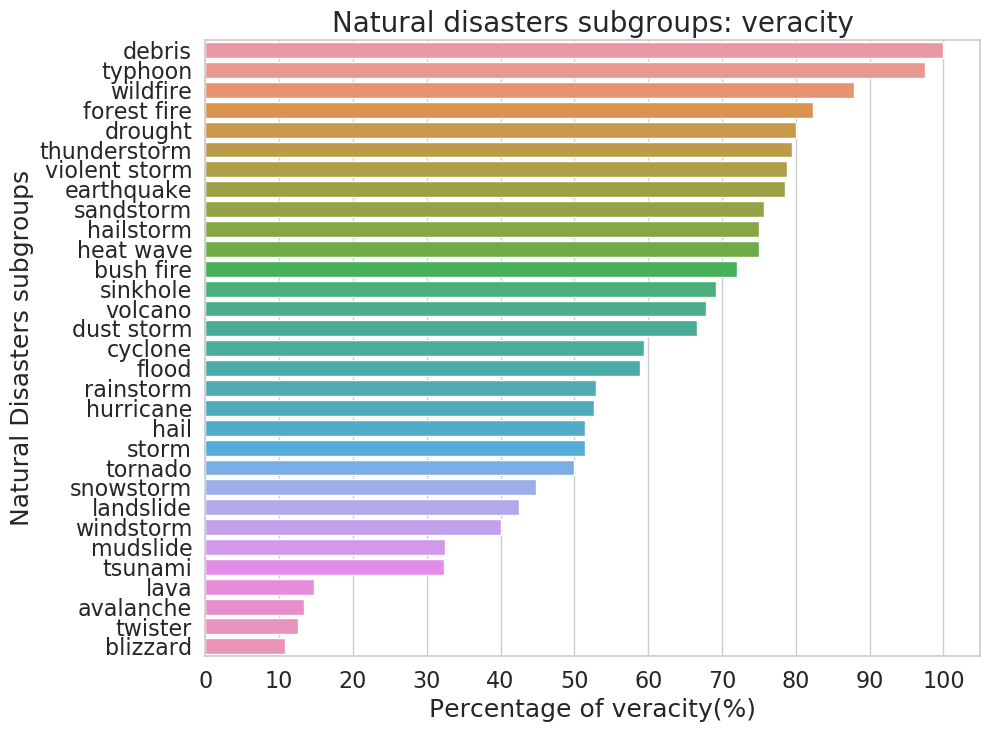

In [75]:
#Veracity of the subgroups
subVeracity = natDisastGrouped.reset_index().sort_values(by='truth_percentage',ascending=False)
ax = sns.barplot(x = 'truth_percentage', y = subVeracity.subgroup, data = subVeracity);
ax.set_title('Natural disasters subgroups: veracity', fontsize=20)
ax.set_xlabel('Percentage of veracity(%)', fontsize = 18)
ax.set_ylabel('Natural Disasters subgroups', fontsize = 18)
ax.tick_params(axis="x", labelsize='large')
ax.tick_params(axis="x", labelsize=16)
ax.tick_params(axis="y", labelsize=16)
ax.set_xticks(np.arange(0,110,10))
ax.figure.set_size_inches(10, 8);

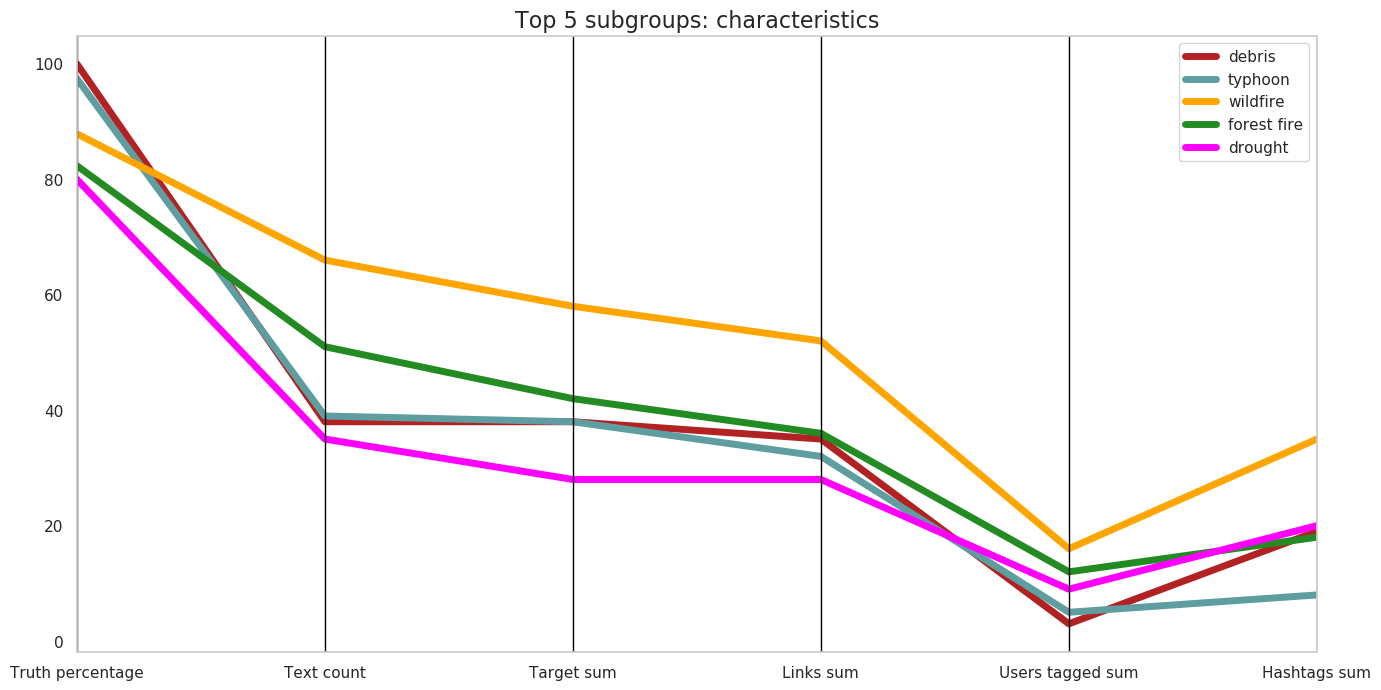

In [76]:
#Parallel coordinates
from pandas.plotting import parallel_coordinates
df = natDisastGrouped.reset_index().sort_values(by='truth_percentage',ascending=False)[:5].rename(columns={'truth_percentage':'Truth percentage', 'text_count':'Text count',\
                                                                                                           'target_sum':'Target sum','links_sum':'Links sum',\
                                                                                                           'users_tagged_sum':'Users tagged sum','hashtags_sum':'Hashtags sum'})
lineColors = ('firebrick','cadetblue','orange','forestgreen','magenta')

ax = parallel_coordinates(df, 'subgroup', cols = ['Truth percentage', 'Text count','Target sum','Links sum', 'Users tagged sum','Hashtags sum'],\
                          color = lineColors, lw = 5.0)
ax.set_title('Top 5 subgroups: characteristics', fontsize= 16)
ax.figure.set_size_inches(16, 8)
ax.legend(loc='best');

In [77]:
#Analysis of kind of hashtags used in tweets based on tweet's veracity

In [78]:
tweetsInfo = twitterCleanData[['text', 'target']]
tweetsInfo.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [79]:
#Receives a text
#Returns a list containing all valid hashtags on the text
#A hashtag is valid if it only contains alphanumeric values
def getValidHashtags(text, char):
    resultingHashtags = []
    text = text.split()
    for word in text:
        hashtag = getter(word, char)
        if validHashtag(hashtag) == True:
                resultingHashtags.append(hashtag)
    return resultingHashtags

In [80]:
hashtagsDataFrame = hashtagsDataFrame.reset_index()
hashtagsDataFrame = hashtagsDataFrame.rename(columns = {'index' : 'hashtag'})
hashtagsDataFrame.head()

,hashtag,occurrence,target_sum
0,#earthquake,19,19
1,#wildfires,5,5
2,#alaska,2,1
3,#rockyfire,4,4
4,#cafire,2,2


In [81]:
textPerVeracity = tweetsInfo.groupby('target').agg({'text' : 'sum'})

In [82]:
#Returns a DF with hashtags included in tweets of veracity 'target', their occurrence and target_sum
#target = 0 -> false tweets
#target = 1 -> real tweets
def hashtagPerVeracityDFMaker(target, char):
    df = pd.DataFrame()
    df['hashtag'] = getValidHashtags(textPerVeracity.loc[target,'text'], char)
    df = hashtagsDataFrame.merge(df, on = 'hashtag')
    df = df.drop_duplicates()
    return df

In [83]:
#Creating DF with hashtags and the veracity of the tweets containing them
#Hashtags in false tweets:
DFHashtagPerFalseTweets = hashtagPerVeracityDFMaker(0, '#')
DFHashtagPerFalseTweets['occurrence'] = DFHashtagPerFalseTweets['occurrence'] - DFHashtagPerFalseTweets['target_sum']
del DFHashtagPerFalseTweets['target_sum']
top10HashtagPerFalseTweets = DFHashtagPerFalseTweets.nlargest(10, columns = 'occurrence')
top10HashtagPerFalseTweets.head(3)

,hashtag,occurrence
5,#nowplaying,21
19,#news,20
336,#hot,17


In [84]:
#Some statistics
DFHashtagPerFalseTweets.describe()

,occurrence
count,402.00
mean,1.69
std,2.27
min,1.00
25%,1.00
50%,1.00
75%,1.00
max,21.00


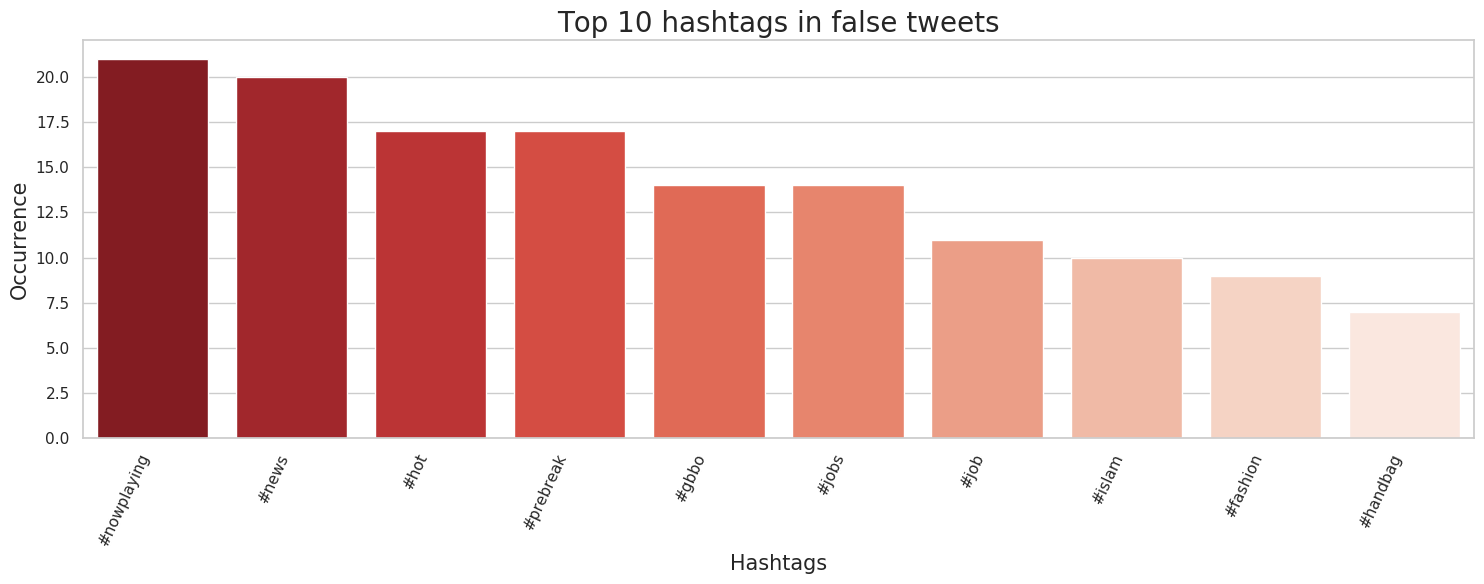

In [85]:
#Bar plot
ax = sns.barplot(x = 'hashtag', y = 'occurrence', data = top10HashtagPerFalseTweets,\
                 palette = sns.color_palette("Reds_r", 10))
ax.set_xlabel('Hashtags', fontsize = 15)
ax.set_ylabel('Occurrence', fontsize = 15)
ax.set_title('Top 10 hashtags in false tweets', fontsize = 20)
plt.xticks(rotation = 65, horizontalalignment = 'right')
ax.figure.set_size_inches(15, 6)
plt.tight_layout()
ax.get_figure().savefig("Top10HashtagsInFalseTweets.png")

In [86]:
#Hashtags in real tweets:
DFHashtagPerRealTweets = hashtagPerVeracityDFMaker(1, '#')
DFHashtagPerRealTweets['occurrence'] = DFHashtagPerRealTweets['target_sum']
del DFHashtagPerRealTweets['target_sum']
top10HashtagPerRealTweets = DFHashtagPerRealTweets.nlargest(10, 'occurrence')
top10HashtagPerRealTweets.head(3)

,hashtag,occurrence
25,#news,54
88,#hiroshima,21
0,#earthquake,19


In [87]:
#Some statistics
DFHashtagPerRealTweets.describe()

,occurrence
count,306.00
mean,2.11
std,3.80
min,1.00
25%,1.00
50%,1.00
75%,2.00
max,54.00


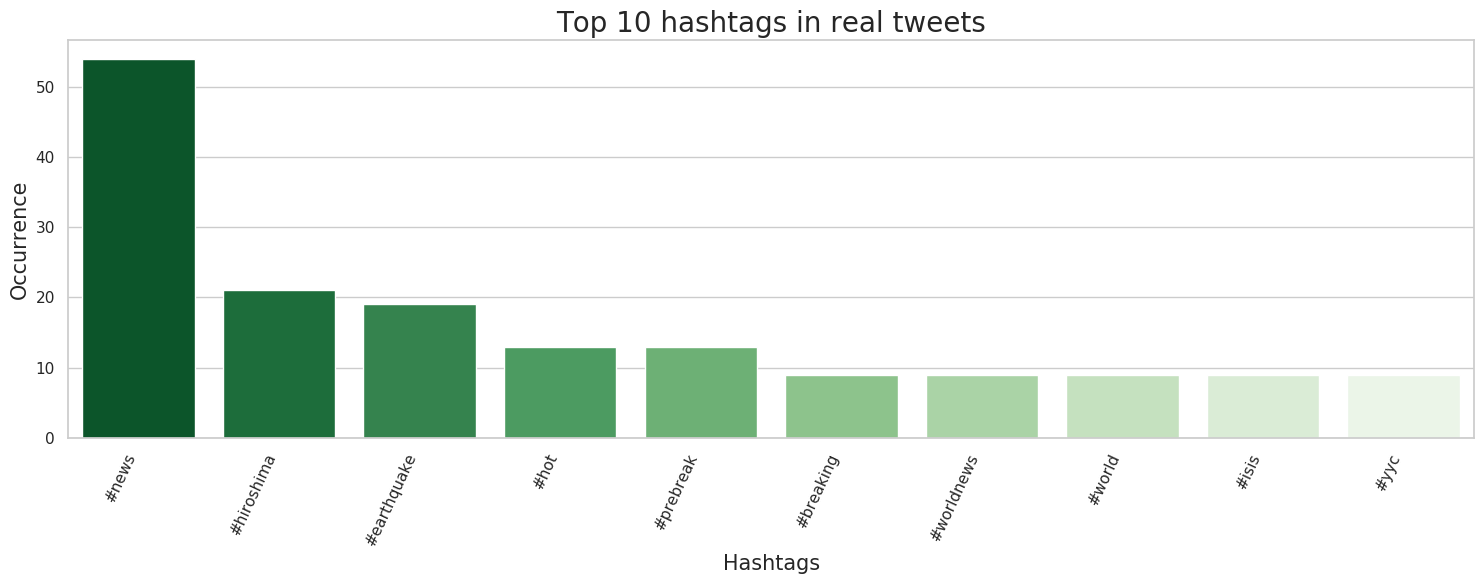

In [88]:
#Bar plot
ax = sns.barplot(x = 'hashtag', y = 'occurrence', data = top10HashtagPerRealTweets,\
                 palette = sns.color_palette("Greens_r", 10))
ax.set_xlabel('Hashtags', fontsize = 15)
ax.set_ylabel('Occurrence', fontsize = 15)
ax.set_title('Top 10 hashtags in real tweets', fontsize = 20)
plt.xticks(rotation = 65, horizontalalignment = 'right')
ax.figure.set_size_inches(15, 6)
plt.tight_layout()
ax.get_figure().savefig("Top10HashtagsInRealTweets.png")

In [89]:
#Comparison between hashtags that appear both in real and false tweets
hashtagsPerVeracity = DFHashtagPerFalseTweets.merge(DFHashtagPerRealTweets, on = 'hashtag')
hashtagsPerVeracity.head(3)

,hashtag,occurrence_x,occurrence_y
0,#news,20,54
1,#gilbert23,2,1
2,#video,2,2


In [90]:
hashtagsPerVeracity['total occurrence'] = hashtagsPerVeracity['occurrence_x'] + hashtagsPerVeracity['occurrence_y']
hashtagsPerVeracity = hashtagsPerVeracity.rename(columns = {'occurrence_y' : 'occurrence real tweets'})
del hashtagsPerVeracity['occurrence_x']
top10HashtagsPerVeracity = hashtagsPerVeracity.nlargest(20, 'total occurrence')

In [91]:
hashtagsPerVeracity.describe()

,occurrence real tweets,total occurrence
count,45.00,45.00
mean,3.93,7.00
std,8.19,11.92
min,1.00,2.00
25%,1.00,3.00
50%,2.00,3.00
75%,3.00,6.00
max,54.00,74.00


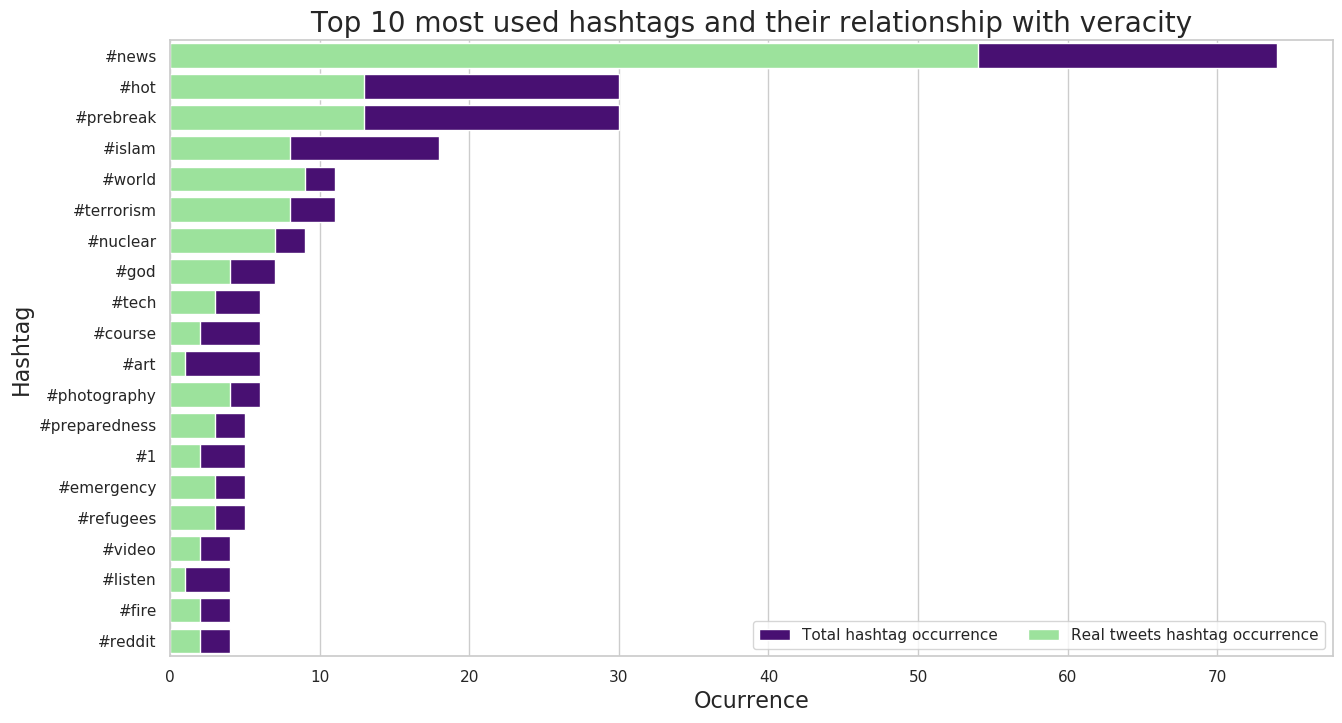

In [92]:
#Barplot
f, ax = plt.subplots(figsize = (15, 8))
sns.barplot(x = 'total occurrence', y = 'hashtag', data = top10HashtagsPerVeracity,\
            label = 'Total hashtag occurrence', color = 'indigo', edgecolor = 'w')
sns.barplot(x = 'occurrence real tweets', y = 'hashtag', data = top10HashtagsPerVeracity,
            label = 'Real tweets hashtag occurrence', color = 'lightgreen', edgecolor = 'w')
ax.legend(ncol = 2, loc = 'lower right')
ax.set_xlabel('Ocurrence', fontsize = 16)
ax.set_ylabel('Hashtag', fontsize = 16)
ax.set_title('Top 10 most used hashtags and their relationship with veracity', fontsize = 20)
plt.savefig("Top10HashtagsAndTheirVeracity.png")
plt.show()

In [93]:
locations = pd.read_csv('./ToChangeKeywordsAndLocations/worldcities.csv', encoding = 'latin-1')
tweets = pd.read_csv('./ToChangeKeywordsAndLocations/withoutEncoding.csv')
tweets['country'] = np.nan
tweets['lat'] = np.nan
tweets['long'] = np.nan

In [94]:
cities = {}
countries = {}
cityExceptions = {'London':'United Kingdom','Glasgow':'United Kingdom', 'Birmingham': 'United Kingdom', 'Rome':'Italy','Delhi':'India',\
                 'Paris':'France', 'Moscow':'Russia', 'Geneva':'Switzerland', 'Melbourne':'Australia','Manchester':'United Kingdom','Leicester':'United Kingdom'}
states = {}
def applyCriteria(row):
    if cities.get(row['city'], False) or (cityExceptions.get(row['city'], False) and cityExceptions.get(row['city']) != row['country']):
        return row
    cities[row['city'].lower().strip('.').rstrip()] = [(row['lat'], row['lng']),row['iso3']]
    countries[row['country'].lower().strip('.').rstrip()] = row['iso3']
    if ((row['capital'] == 'admin' or row['capital'] == 'primary') and isinstance(row['admin_name'], str)):
        states[row['admin_name'].lower().strip('.').rstrip()] = [(row['lat'], row['lng']),row['iso3']]
locations.apply(applyCriteria, axis = 1)

0        None
1        None
2        None
3        None
4        None
         ... 
15488    None
15489    None
15490    None
15491    None
15492    None
Length: 15493, dtype: object

In [95]:
changePlace = {'ny': 'new york', 'la': 'los angeles', 'ca': 'california', 'tx': 'texas', 'us':'usa', 'nc': 'north carolina'}
def addNewData(row):
    place = row['location']
    if place in changePlace:
        place = changePlace[place]
    if place in countries:
        row['country'] = countries[place]
    elif place in states:
        row['country'] = states[place][1]
        row['lat'] = states[place][0][0]
        row['long'] = states[place][0][1]
    elif place in cities:
        row['country'] = cities[place][1]
        row['lat'] = cities[place][0][0]
        row['long'] = cities[place][0][1]
    return row
tweets = tweets.apply(addNewData, axis = 1, result_type= 'expand')
tweets.tail(5)

,id,keyword,location,text,target,country,lat,long
7608,10869,bridge collapse,unknown,Two giant cranes holding a bridge collapse int...,1,NaN,nan,nan
7609,10870,wild fires,california,@aria_ahrary @TheTawniest The out of control w...,1,USA,38.57,-121.47
7610,10871,volcano,unknown,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,NaN,nan,nan
7611,10872,police,unknown,Police investigating after an e-bike collided ...,1,NaN,nan,nan
7612,10873,wildfire,california,The Latest: More Homes Razed by Northern Calif...,1,USA,38.57,-121.47


In [96]:
#Geo analysis
from shapely.geometry import Point
import geopandas as gpd

frames = [disastersDF, tweets[['country','lat','long']]]
disastersWorldDF = pd.concat(frames, axis = 1)

condition = ~(disastersWorldDF.keyword.isin(allNaturalDisasters))
natDisastWorldDF = disastersWorldDF.drop(disastersWorldDF[condition].index)#Creating a DF with the natural disasters only

#Droping rows with NaNs
natDisastWorldDF.dropna(inplace = True)

#Creating a new column with the coordinates
natDisastWorldDF['coordinates'] = list(zip(natDisastWorldDF['long'],natDisastWorldDF['lat']))
natDisastWorldDF['coordinates'] = natDisastWorldDF['coordinates'].apply(Point)
natDisastWorldDF.head()

,id,keyword,location,text,target,tweet_length,users_tagged,hashtags,links,country,lat,long,coordinates
13,19,flood,bago,#Flood in Bago Myanmar #We arrived Bago,1,39,0,2,0,MMR,17.32,96.52,POINT (96.515 17.32)
517,746,avalanche,los angeles,#WeLoveLA #NHLDucks Avalanche Defense: How The...,0,112,0,3,1,USA,34.11,-118.41,POINT (-118.4068 34.1139)
520,752,avalanche,colorado,#Colorado #Avalanche Men's Official Colorado A...,0,125,0,4,1,USA,39.76,-104.88,POINT (-104.8759 39.7621)
522,754,avalanche,new york,I BET YOU DIDNT KNOW I KICK BOX TOO! https://t...,0,60,0,0,1,USA,42.67,-73.80,POINT (-73.7987 42.6664)
524,758,avalanche,colorado,PATRICK ROY 1998-99 UPPER DECK SPX #171 FINITE...,0,126,0,1,2,USA,39.76,-104.88,POINT (-104.8759 39.7621)


In [97]:
#Some iso codes are integers
def fixISOCode(dataFrame):
    dataFrame.loc[43, 'iso_a3'] = 'FRA'
    dataFrame.loc[21, 'iso_a3'] = 'NOR'
    dataFrame.loc[174, 'iso_a3'] = 'RKS'

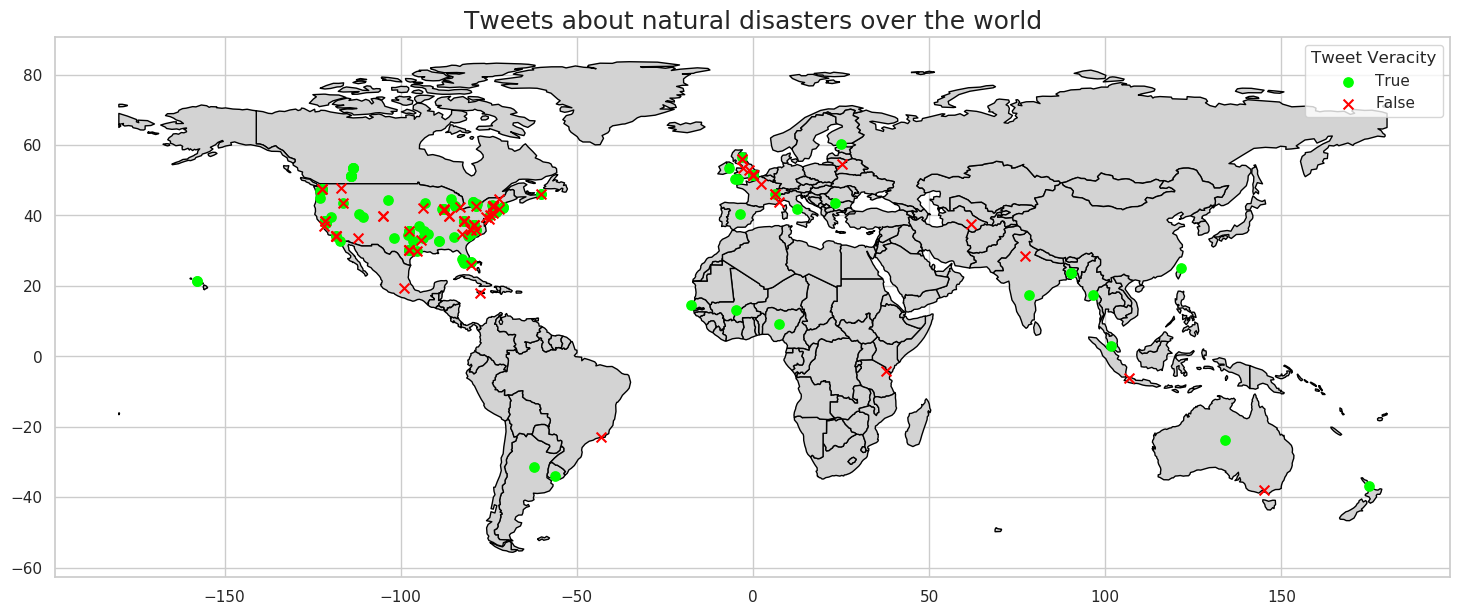

In [98]:
trueNatDisast = natDisastWorldDF[natDisastWorldDF.target == 1]
falseNatDisast = natDisastWorldDF[natDisastWorldDF.target == 0]

#creating a geopandas data frame
trueNatDisast = gpd.GeoDataFrame(trueNatDisast, geometry='coordinates')
falseNatDisast = gpd.GeoDataFrame(falseNatDisast, geometry='coordinates')

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')) #World map
world = world[world.name != 'Antarctica']
fixISOCode(world)
ax = world.plot(color='lightgrey',edgecolor='black', figsize = (18,10)) #Setting colors

graf = trueNatDisast.plot(ax=ax, legend=True, marker='o', color= 'lime', markersize = 45)
graf = falseNatDisast.plot(ax=ax, legend=True, marker='x', color='red', markersize = 50)
graf.axes.set_title('Tweets about natural disasters over the world', fontsize = 18)
graf.legend(['True','False'], title = 'Tweet Veracity');

In [99]:
#Truth percentage per country
disastersWorldDF.dropna(subset = ['country'], inplace = True)
groupedCountry = disastersWorldDF.groupby(['country']).agg({'target':'sum','text':'count','hashtags':'sum','users_tagged':'sum','links':'sum'})
groupedCountry['truth_percentage'] = (groupedCountry.target / groupedCountry.text) * 100

#groupedCountry.rename(columns = {'target':'target_count', 'text':'text_count'}, inplace = True)
groupedCountry.reset_index(inplace=True)
groupedCountry.rename(columns = {'country':'iso_a3', 'target':'target_count', 'text':'text_count'}, inplace=True)

groupedCountry = groupedCountry[groupedCountry.text_count >= 5]

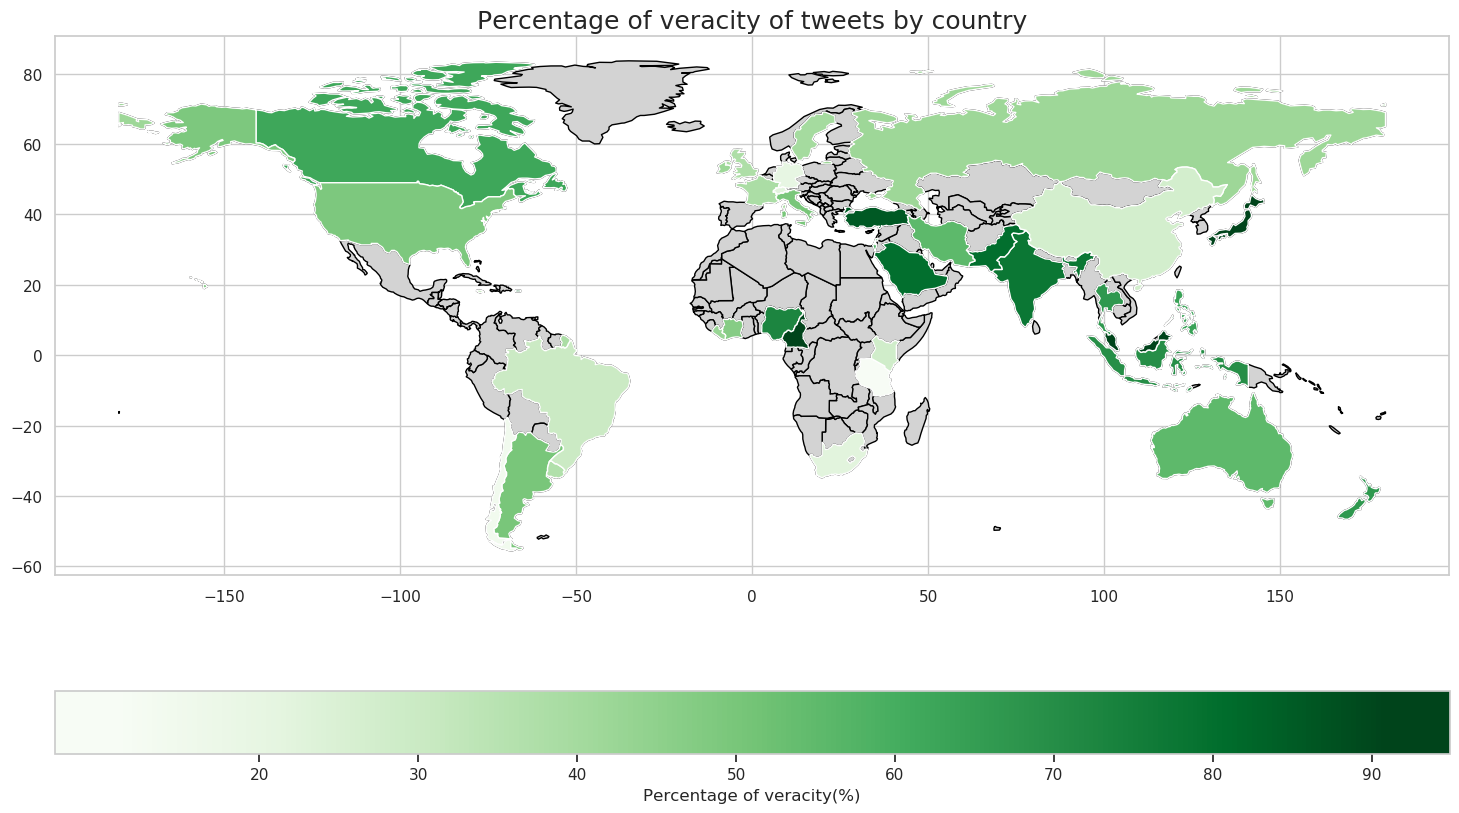

In [100]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[world.name != 'Antarctica']
fixISOCode(world)
ax = world.plot(column = 'name',color='lightgrey',edgecolor='black', figsize = (18,10))
world = world.merge(groupedCountry) #Merging the data frame so we have the info

#Plot
graf = world.plot(ax = ax, column='truth_percentage', legend = True, cmap='Greens',\
                 legend_kwds={'label': 'Percentage of veracity(%)', 'orientation': 'horizontal','extend':'both','extendrect':True})
graf.axes.set_title('Percentage of veracity of tweets by country', fontsize = 18);

In [101]:
#USA geo analysis
#Function to find which state a point belongs to
def findState(coordinate, statesDF):
    iterable = statesDF.values #List of list [state, polygon]
    for stateInfo in iterable:
        if coordinate.within(stateInfo[1]):
            return stateInfo[0]
    return np.nan

In [102]:
import geoplot as gplt
usaData = disastersWorldDF[disastersWorldDF.country == 'USA'].dropna()
usaData['coordinates'] = list(zip(usaData['long'],usaData['lat']))
usaData['coordinates'] = usaData['coordinates'].apply(Point)

contiguousUsa = gpd.read_file(gplt.datasets.get_path('contiguous_usa')) #USA map with contiguous states
usaData['state'] = usaData.coordinates.apply(findState, args = (contiguousUsa[['state','geometry']],))
usaData.dropna(inplace=True)

#Grouping per state
statesGrouped = usaData.groupby('state').agg({'text':'count', 'target':'sum', 'users_tagged':'sum', 'hashtags':'sum', 'links':'sum',\
                                             'tweet_length':['max','min','mean']})

#Renaming the labels
labels0 = statesGrouped.columns.get_level_values(0)
labels1 = statesGrouped.columns.get_level_values(1)
statesGrouped.columns = labels0 + '_' + labels1
statesGrouped['truth_percentage'] = (statesGrouped.target_sum / statesGrouped.text_count) * 100
statesGrouped = statesGrouped[statesGrouped.text_count >= 5]
statesGrouped.reset_index(inplace=True)
statesGrouped.head(5)

,state,text_count,target_sum,users_tagged_sum,hashtags_sum,links_sum,tweet_length_max,tweet_length_min,tweet_length_mean,truth_percentage
0,Alabama,15,9,2,7,14,136,76,107.87,60.00
1,Arizona,14,6,8,2,7,138,19,101.57,42.86
2,Arkansas,12,5,8,2,3,140,29,81.58,41.67
3,California,113,77,15,59,107,144,16,104.13,68.14
4,Colorado,22,9,11,20,21,140,46,118.77,40.91


In [103]:
#Now we combine that data frame with the contiguousUsa data frame to obtain a geodataframe
contiguousUsa = contiguousUsa[['state','geometry']]
usaStatesInfo = contiguousUsa.merge(statesGrouped)
usaStatesInfo.head(5)

,state,geometry,text_count,target_sum,users_tagged_sum,hashtags_sum,links_sum,tweet_length_max,tweet_length_min,tweet_length_mean,truth_percentage
0,Washington,"POLYGON ((-116.99807 46.33017, -116.90653 46.1...",22,14,10,14,12,140,68,117.09,63.64
1,Arizona,"POLYGON ((-109.04523 36.99991, -109.04367 31.3...",14,6,8,2,7,138,19,101.57,42.86
2,California,"POLYGON ((-114.35490 34.46467, -114.16597 34.2...",113,77,15,59,107,144,16,104.13,68.14
3,Colorado,"POLYGON ((-102.05017 40.00082, -102.04012 38.4...",22,9,11,20,21,140,46,118.77,40.91
4,New Mexico,"POLYGON ((-103.00161 33.87995, -103.00161 31.9...",6,1,2,2,5,138,49,96.83,16.67


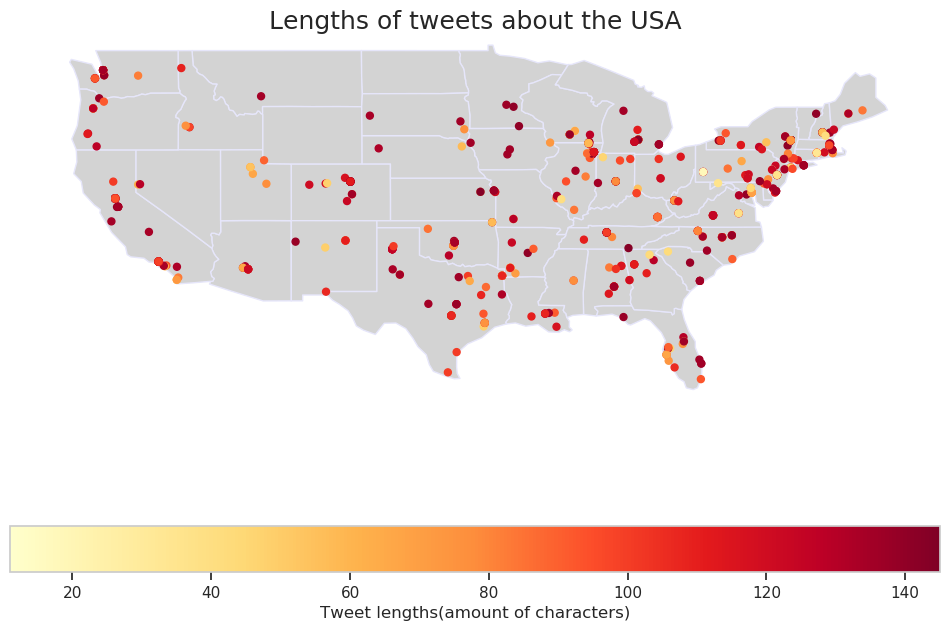

In [104]:
#Point plot
usaData = gpd.GeoDataFrame(usaData, geometry='coordinates')
mapUSA = gpd.read_file(gplt.datasets.get_path('contiguous_usa'))
ax = mapUSA.plot(color = 'lightgrey', edgecolor= 'lavender', figsize=(12,10))

graf = gplt.pointplot(usaData, hue='tweet_length', cmap = 'YlOrRd', legend = True, ax = ax, legend_kwargs={'label': 'Tweet lengths(amount of characters)', 'orientation': 'horizontal'})
plt.title('Lengths of tweets about the USA',fontsize = 18);

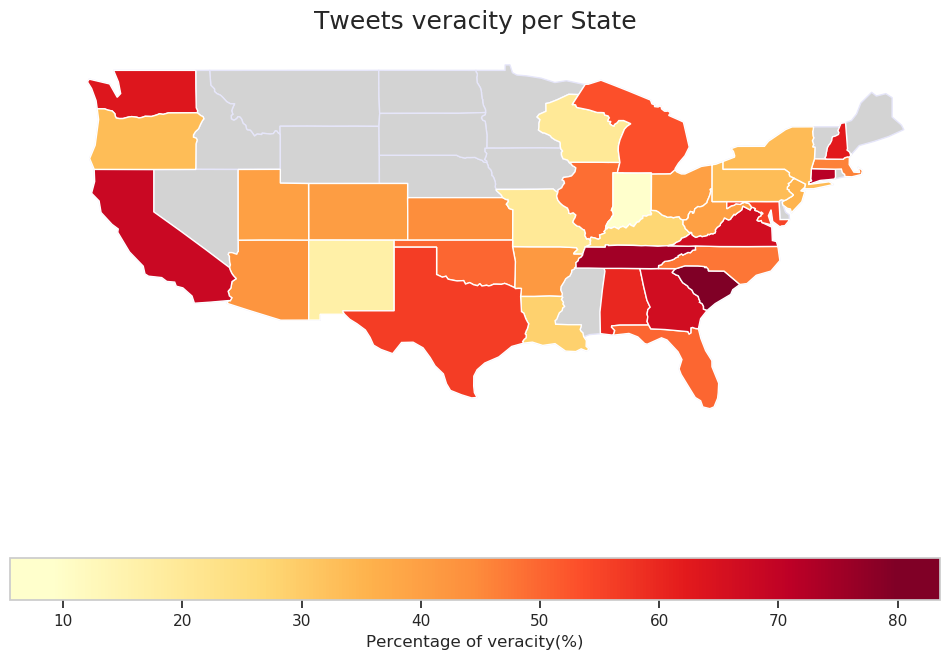

In [105]:
#Choropleth
ax = mapUSA.plot(color = 'lightgrey', edgecolor= 'lavender', figsize=(12,10))
graf = gplt.choropleth(usaStatesInfo, hue='truth_percentage', cmap='YlOrRd', legend=True,ax=ax,legend_kwargs={'label': 'Percentage of veracity(%)', 'orientation': 'horizontal',\
                                                                                                             'extend':'both','extendrect':True})
plt.title('Tweets veracity per State',fontsize = 18);

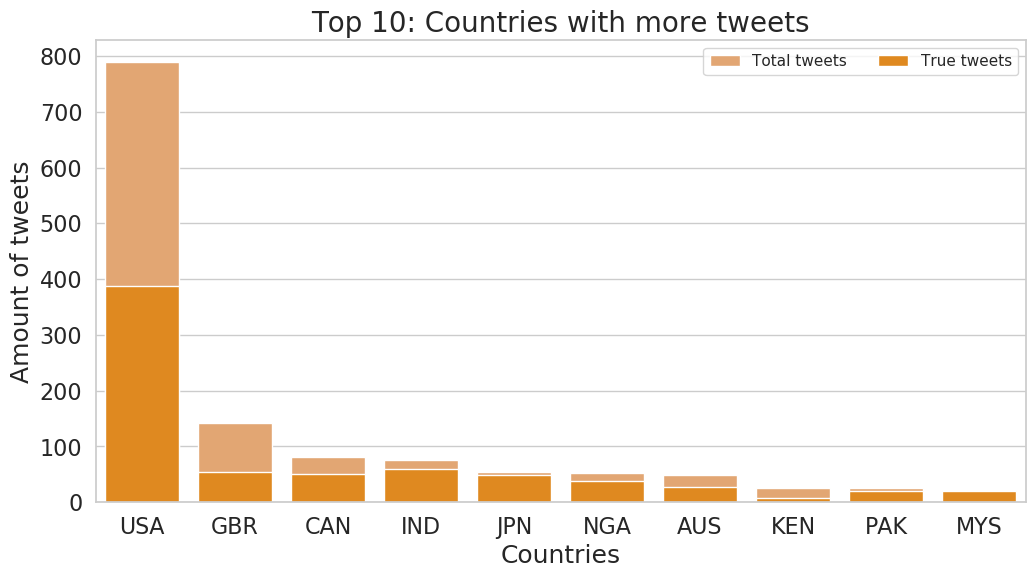

In [106]:
#Top 10 countries with more tweets
top10Countries = groupedCountry.loc[groupedCountry.text_count.nlargest(10).index]
ax = sns.barplot(x='iso_a3', y = 'text_count', data = top10Countries,color='sandybrown', label = 'Total tweets')
sns.barplot(x='iso_a3', y = 'target_count', data = top10Countries,color='darkorange', label = 'True tweets')

ax.set_title('Top 10: Countries with more tweets', fontsize=20)
ax.set_xlabel('Countries', fontsize = 18)
ax.set_ylabel('Amount of tweets', fontsize = 18)
ax.tick_params(axis="both", labelsize=16)
ax.legend(ncol=2, loc='best', frameon=True)
ax.figure.set_size_inches(12, 6);

In [107]:
wordsCount = pd.read_csv('./ToChangeKeywordsAndLocations/wordCount.csv', encoding = 'latin-1')
tweets = pd.read_csv('./ToChangeKeywordsAndLocations/withoutEncoding.csv', usecols = ['id','target'])

In [108]:
wordsCount = wordsCount.merge(tweets)
wordsCount.drop(['id','totalAmount'], inplace = True, axis = 1)

In [109]:
wordsCount.amountOfVerbs.value_counts()

1     1806
2     1693
0     1243
3     1238
4      815
5      450
6      219
7      103
8       27
9       11
10       7
11       1
Name: amountOfVerbs, dtype: int64

In [110]:
wordsCount.amountOfAdjectives.value_counts()

0    2929
1    2497
2    1372
3     570
4     181
5      43
6      17
7       2
9       2
Name: amountOfAdjectives, dtype: int64

In [111]:
wordsCount.amountOfAdverbs.value_counts()

0    5063
1    1691
2     582
3     214
4      46
5      13
7       2
6       2
Name: amountOfAdverbs, dtype: int64

In [112]:
wordsCount.amountOfNouns.value_counts()

7     925
6     856
8     817
5     758
9     734
4     727
3     563
10    447
2     416
11    394
12    248
1     201
13    152
14    120
15     74
16     41
17     34
18     31
0      23
19     18
20     15
22     10
21      6
25      2
23      1
Name: amountOfNouns, dtype: int64

In [113]:
wordsCount.restOfWords.value_counts()

2     1283
3     1130
4      989
1      986
5      786
0      623
6      614
7      459
8      367
9      178
10     125
11      48
12      15
13       7
15       2
14       1
Name: restOfWords, dtype: int64

In [114]:
verbs = wordsCount[wordsCount.amountOfVerbs == 7]
verbs

,amountOfVerbs,amountOfPronouns,amountOfNouns,amountOfAdjectives,amountOfAdverbs,restOfWords,target
11,7,3,14,1,0,2,1
66,7,5,2,1,0,4,0
133,7,4,4,2,1,2,0
484,7,4,5,1,0,5,0
503,7,2,2,0,1,3,0
...,...,...,...,...,...,...,...
7261,7,1,5,2,5,6,0
7284,7,2,7,0,3,9,0
7322,7,2,7,2,1,6,0
7441,7,4,3,1,2,4,0


In [115]:
verbsSerie = wordsCount[wordsCount['amountOfVerbs'] == 7].tail(100).applymap(lambda x: x/7).sum()
verbsSerie.target *= 7

pronounsSerie = wordsCount[wordsCount['amountOfPronouns'] == 4].tail(100).applymap(lambda x: x/4).sum()
pronounsSerie.target *= 4

nounsSerie = wordsCount[wordsCount['amountOfNouns'] == 14].tail(100).applymap(lambda x: x/14).sum()
nounsSerie.target *= 14

adjectivesSerie = wordsCount[wordsCount['amountOfAdjectives'] == 3].tail(100).applymap(lambda x: x/3).sum()
adjectivesSerie.target *= 3

adverbsSerie = wordsCount[wordsCount['amountOfAdverbs'] == 4].tail(100).applymap(lambda x: x/4).sum()
adverbsSerie.target *= 4

restOfWordsSerie = wordsCount[wordsCount['restOfWords'] == 10].tail(100).applymap(lambda x: x/10).sum()
restOfWordsSerie.target *= 10

In [116]:
finalDF = pd.concat([verbsSerie.to_frame().T, pronounsSerie.to_frame().T, nounsSerie.to_frame().T, adjectivesSerie.to_frame().T,\
          adverbsSerie.to_frame().T,restOfWordsSerie.to_frame().T])
finalDF.reset_index(inplace=True)
finalDF.drop('index', inplace = True, axis = 1)
finalDF.rename(columns = {'target':'Target sum'}, inplace = True)

In [117]:
finalDF

,amountOfVerbs,amountOfPronouns,amountOfNouns,amountOfAdjectives,amountOfAdverbs,restOfWords,Target sum
0,100.00,39.86,84.71,17.29,19.00,92.43,23.00
1,123.00,100.00,144.75,30.50,30.00,154.25,18.00
2,9.29,1.43,100.00,4.93,1.36,21.14,44.00
3,88.00,27.00,243.33,100.00,23.67,169.33,52.00
4,46.25,23.00,58.75,19.50,46.00,58.75,17.00
5,37.20,14.70,74.90,15.90,8.80,100.00,48.00


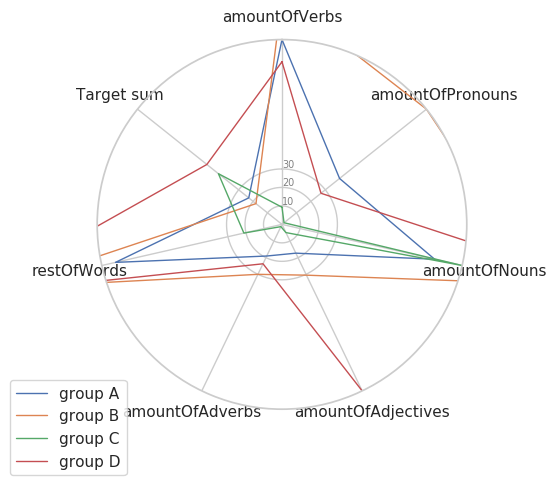

In [118]:
from math import pi
 
# Set data
df = pd.DataFrame({
'group': ['A','B','C','D'],
'var1': [38, 1.5, 30, 4],
'var2': [29, 10, 9, 34],
'var3': [8, 39, 23, 24],
'var4': [7, 31, 33, 14],
'var5': [28, 15, 32, 14]
})

categories = list(finalDF)
N = len(categories)
 
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
plt.ylim(0,100)

values = finalDF.loc[0].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group A")
#ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=finalDF.loc[1].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group B")
#ax.fill(angles, values, 'r', alpha=0.1)

# Ind2
values=finalDF.loc[2].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group C")
#ax.fill(angles, values, 'g', alpha=0.1)

# Ind2
values=finalDF.loc[3].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group D")
#ax.fill(angles, values, 'k', alpha=0.8)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))


In [119]:
finalDF.loc[0].values.flatten().tolist()

[100.0,
 39.85714285714286,
 84.71428571428574,
 17.28571428571428,
 19.0,
 92.42857142857142,
 22.999999999999993]